In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Final Data Processing.

In [2]:
df = pd.read_csv('final_data_0_iter_32.csv') #iterations = 3, nbit = 1024

In [3]:
df

,name,molweight,critical temperature (K),acentric factor,boiling point (K),SMILES,ECFP_Bits
0,(+)-camphene,136.23704,638.00,0.2960,432.65,CC1(C)C2CCC(C2)C1=C,01001000000000000000001000010010
1,(-)-a-pinene,136.23704,647.00,0.3410,429.35,CC1=CC[C@H]2C[C@@H]1C2(C)C,01001000000000000100000000010010
2,(-)-camphene,136.23704,638.00,0.2960,439.95,CC1(C)C2CCC(C2)C1=C,01001000000000000000001000010010
3,"(1,1-dimethylbutyl)benzene",162.27492,697.15,0.4370,478.65,CCCC(C)(C)c1ccccc1,01001000000000001110000000000000
4,(1-butylhexadecyl)benzene,358.65124,851.65,0.7590,693.15,CCCCCCCCCCCCCCCC(CCCC)c1ccccc1,01001000000000001100000000000000
...,...,...,...,...,...,...,...
5895,vinylacetylene,52.07576,454.00,0.1180,278.25,C/C=C/C=C,01000000000000000000001000000000
5896,vinylcyclohexene,108.18328,599.00,0.3290,401.00,CC(C)/C=C/Cl,01000000000000000001001000000000
5897,water,18.01528,647.13,0.3449,373.15,C/C=C/CF,01000000100000001000001000000000
5898,zirconium chloride,233.03480,778.00,0.2980,604.15,C\C(c1ccccc1)=C(\C)c2ccccc2,01001001000000000100000000000000


In [4]:
df.describe()

,molweight,critical temperature (K),acentric factor,boiling point (K)
count,5900.000000,5900.000000,5900.000000,5900.000000
mean,162.792075,650.688900,0.489841,460.435158
std,75.747231,109.978203,0.205024,95.686479
min,16.042760,126.200000,0.010500,77.340000
25%,114.230920,587.155000,0.332000,400.990000
50%,148.181780,639.915000,0.447000,456.150000
75%,182.349440,720.627500,0.645250,513.150000
max,626.327880,1314.000000,1.116000,797.080000


#### Get distribution of the different properties

array([[<AxesSubplot:title={'center':'molweight'}>,
        <AxesSubplot:title={'center':'critical temperature (K)'}>],
       [<AxesSubplot:title={'center':'acentric factor'}>,
        <AxesSubplot:title={'center':'boiling point (K)'}>]], dtype=object)

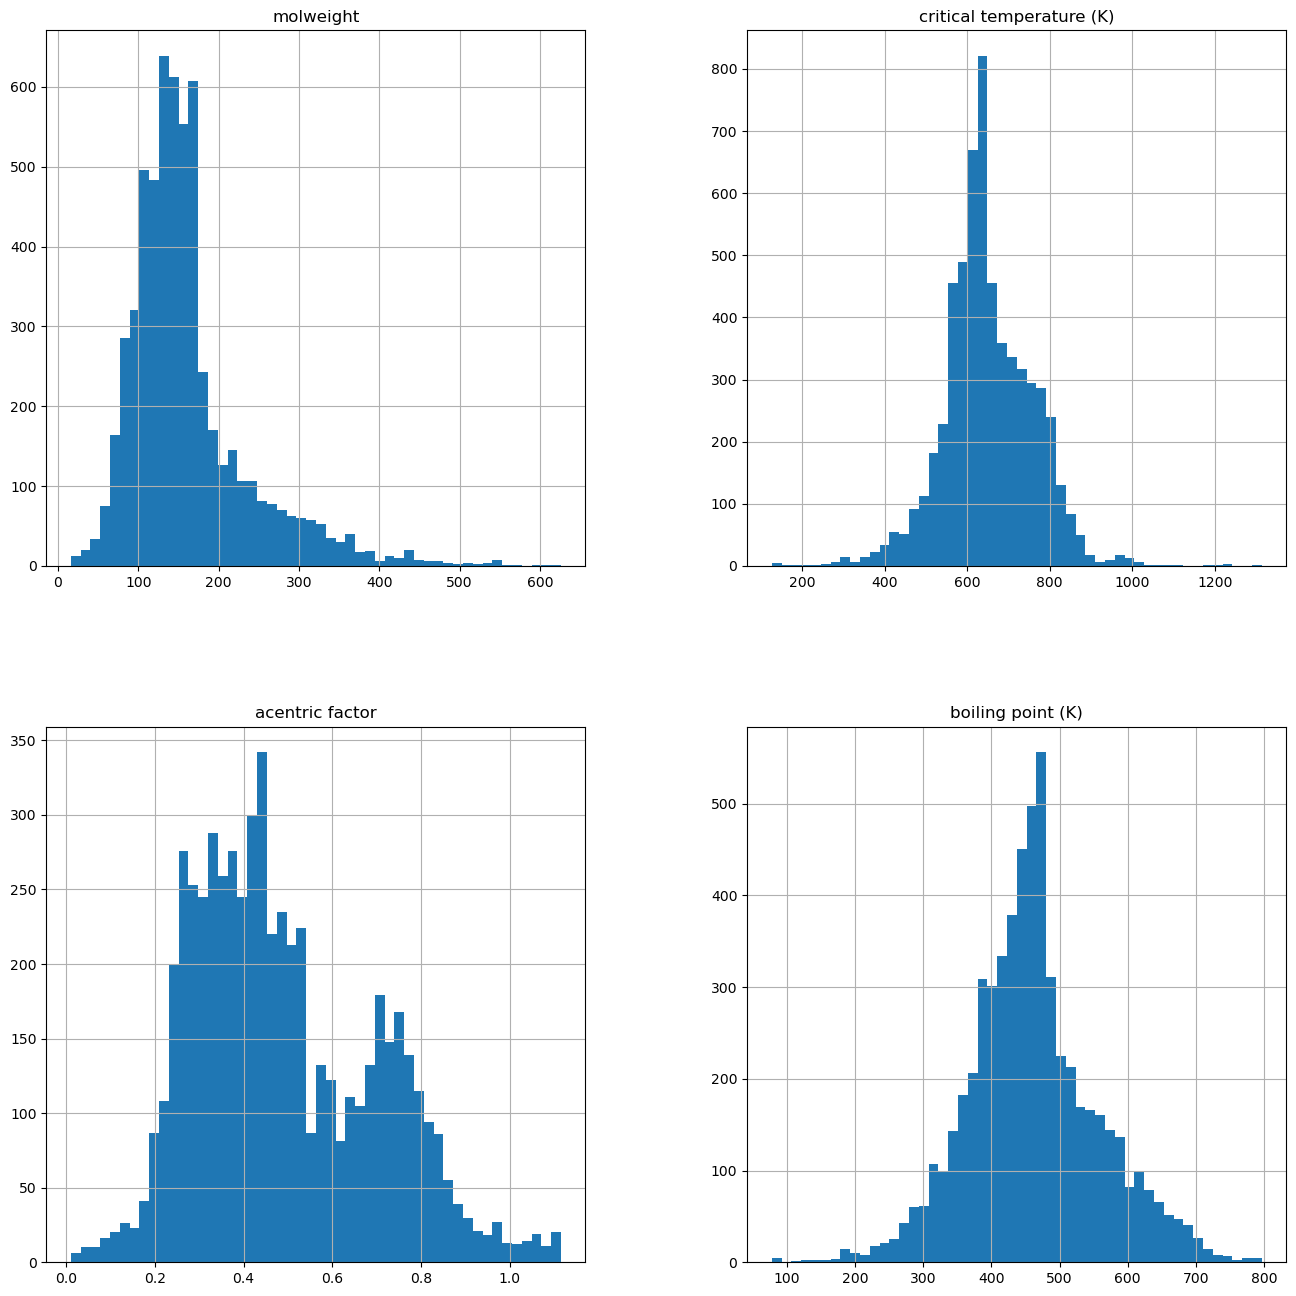

In [5]:
df[['molweight','critical temperature (K)','acentric factor','boiling point (K)']].hist(layout=(2,2),figsize=(16,16),bins=50)

In [6]:
df['ECFP_Bits'].apply(lambda x: len(x)).unique() #Verfiying all bit lengths

array([32], dtype=int64)

In [7]:
ECFP = df['ECFP_Bits'].str.split('',expand=True)

In [8]:
ECFP.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,
1,,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,
2,,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,
3,,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
4,,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,


In [9]:
ECFP.drop(columns=[0,33],inplace=True)

In [10]:
ECFP.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The ECFP dataframe can now be seen as Input X.

### Make dataset with molecular weight

In [11]:
ECFP_mol_weight = ECFP.copy(deep=True)
ECFP_mol_weight.insert(0,'MW',df['molweight'])

In [12]:
ECFP_mol_weight.head()

,MW,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,136.23704,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,136.23704,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,136.23704,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,162.27492,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,358.65124,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Normalise Molecular Weight data (using MinMaxScaler())

In [13]:
ECFP_mol_weight['MW'] = (ECFP_mol_weight['MW']-ECFP_mol_weight['MW'].min())/(ECFP_mol_weight['MW'].max()-ECFP_mol_weight['MW'].min())

In [14]:
ECFP_mol_weight.head()

,MW,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.196948,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0.196948,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0.196948,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0.239613,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.561391,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Example 1: Using an ANN as a multi-output regression model. Using just ECFP

#### Neural Network Structure Used:
<br>**2 layer network** with dimensions: [64,3]
<br>**Activation Functions**: All Relu as an intial trial
<br>**Loss Function**: Mean Squared Error
<br>**Optimiser**: Adam
<br>**Epochs**: to be determined

In [15]:
#pip install -U scikit-learn

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
y_cols = ['critical temperature (K)','acentric factor','boiling point (K)']

In [18]:
X = ECFP.astype(float); y= df[y_cols].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Number of hidden units for each layer are given in parameter "layer_dims"

In [19]:
model = Sequential()
model.add(Dense(64,input_shape=(32,),activation='relu'))
model.add(Dense(3,activation='relu'))

In [20]:
model.compile(loss='mse',optimizer='adam')

In [21]:
X_train.dtypes

1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
dtype: object

In [22]:
model.fit(X_train,y_train,epochs = 300)

Epoch 1/300
148/148 [==============================] - 0s 858us/step - loss: 216849.7656
Epoch 2/300
148/148 [==============================] - 0s 832us/step - loss: 201607.8594
Epoch 3/300
148/148 [==============================] - 0s 826us/step - loss: 170497.8906
Epoch 4/300
148/148 [==============================] - 0s 868us/step - loss: 130688.9453
Epoch 5/300
148/148 [==============================] - 0s 872us/step - loss: 90346.1016
Epoch 6/300
148/148 [==============================] - 0s 1ms/step - loss: 57468.9883
Epoch 7/300
148/148 [==============================] - 0s 888us/step - loss: 36282.6055
Epoch 8/300
148/148 [==============================] - 0s 893us/step - loss: 24934.3438
Epoch 9/300
148/148 [==============================] - 0s 1ms/step - loss: 19491.4785
Epoch 10/300
148/148 [==============================] - 0s 968us/step - loss: 16900.6699
Epoch 11/300
148/148 [==============================] - 0s 1ms/step - loss: 15564.4082
Epoch 12/300
148/148 [==========

148/148 [==============================] - 0s 2ms/step - loss: 7003.3257
Epoch 96/300
148/148 [==============================] - 0s 2ms/step - loss: 6996.3057
Epoch 97/300
148/148 [==============================] - 0s 2ms/step - loss: 6992.7930
Epoch 98/300
148/148 [==============================] - 0s 2ms/step - loss: 6988.1001
Epoch 99/300
148/148 [==============================] - 0s 2ms/step - loss: 6982.4561
Epoch 100/300
148/148 [==============================] - 0s 2ms/step - loss: 6977.5762
Epoch 101/300
148/148 [==============================] - 0s 2ms/step - loss: 6975.6895
Epoch 102/300
148/148 [==============================] - 0s 2ms/step - loss: 6970.4160
Epoch 103/300
148/148 [==============================] - 0s 2ms/step - loss: 6963.7822
Epoch 104/300
148/148 [==============================] - 0s 2ms/step - loss: 6960.2866
Epoch 105/300
148/148 [==============================] - 0s 2ms/step - loss: 6956.4946
Epoch 106/300
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 6846.9746
Epoch 190/300
148/148 [==============================] - 0s 2ms/step - loss: 6844.0098
Epoch 191/300
148/148 [==============================] - 0s 2ms/step - loss: 6842.3213
Epoch 192/300
148/148 [==============================] - 0s 2ms/step - loss: 6846.7744
Epoch 193/300
148/148 [==============================] - 0s 2ms/step - loss: 6842.4688
Epoch 194/300
148/148 [==============================] - 0s 2ms/step - loss: 6839.6553
Epoch 195/300
148/148 [==============================] - 0s 2ms/step - loss: 6838.6045
Epoch 196/300
148/148 [==============================] - 0s 2ms/step - loss: 6839.7891
Epoch 197/300
148/148 [==============================] - 0s 2ms/step - loss: 6838.2939
Epoch 198/300
148/148 [==============================] - 0s 2ms/step - loss: 6838.6138
Epoch 199/300
148/148 [==============================] - 0s 2ms/step - loss: 6835.0835
Epoch 200/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 6761.2329
Epoch 284/300
148/148 [==============================] - 0s 2ms/step - loss: 6759.9009
Epoch 285/300
148/148 [==============================] - 0s 2ms/step - loss: 6757.4458
Epoch 286/300
148/148 [==============================] - 0s 2ms/step - loss: 6762.7827
Epoch 287/300
148/148 [==============================] - 0s 2ms/step - loss: 6760.1104
Epoch 288/300
148/148 [==============================] - 0s 2ms/step - loss: 6752.6782
Epoch 289/300
148/148 [==============================] - 0s 2ms/step - loss: 6754.1514
Epoch 290/300
148/148 [==============================] - 0s 2ms/step - loss: 6751.5376
Epoch 291/300
148/148 [==============================] - 0s 2ms/step - loss: 6754.8452
Epoch 292/300
148/148 [==============================] - 0s 2ms/step - loss: 6752.7842
Epoch 293/300
148/148 [==============================] - 0s 2ms/step - loss: 6749.6123
Epoch 294/300
148/148 [==============================] - 

In [23]:
model.evaluate(X_test,y_test)

37/37 [==============================] - 0s 2ms/step - loss: 6672.2109


6672.2109375

#### Evaluate Model for example 1 with K-fold cross validation

In [24]:
#THIS LINE TAKES A WHILE TO RUN!
"""
from sklearn.model_selection import RepeatedKFold

def get_model_example1():
    model = Sequential()
    
    model.add(Dense(512,input_shape=(1024,),activation='relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3,activation='relu'))
    
    model.compile(loss='mse',optimizer='adam')
    return model

def evaluate_model(X,y):
    results=list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    cv = RepeatedKFold(n_splits=10, n_repeats=3)
    
    for train_ix, test_ix in cv.split(X):
		# prepare data
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        #Get and fit Model 
        model=get_model_example1()
        model.fit(X_train,y_train,epochs = 150)
        mae = model.evaluate(X_test,y_test,verbose = 0)
        print(mse)
        results.append(mse)
    return results

results = evaluate_model(X,y)
"""

"\nfrom sklearn.model_selection import RepeatedKFold\n\ndef get_model_example1():\n    model = Sequential()\n    \n    model.add(Dense(512,input_shape=(1024,),activation='relu'))\n    model.add(Dense(256, activation = 'relu'))\n    model.add(Dense(64, activation='relu'))\n    model.add(Dense(3,activation='relu'))\n    \n    model.compile(loss='mse',optimizer='adam')\n    return model\n\ndef evaluate_model(X,y):\n    results=list()\n    n_inputs, n_outputs = X.shape[1], y.shape[1]\n    cv = RepeatedKFold(n_splits=10, n_repeats=3)\n    \n    for train_ix, test_ix in cv.split(X):\n\t\t# prepare data\n        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]\n        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]\n        #Get and fit Model \n        model=get_model_example1()\n        model.fit(X_train,y_train,epochs = 150)\n        mae = model.evaluate(X_test,y_test,verbose = 0)\n        print(mse)\n        results.append(mse)\n    return results\n\nresults = evaluate_model(X,y)\n

#### Evaluating Model using Percentage Error

In [25]:
predictions = model.predict(X_test)

In [26]:
predictions[:5]

array([[6.4817413e+02, 4.5554459e-01, 4.6162903e+02],
       [6.7538562e+02, 5.0149447e-01, 4.7964145e+02],
       [6.7133984e+02, 4.8988712e-01, 4.7967734e+02],
       [6.7133984e+02, 4.8988712e-01, 4.7967734e+02],
       [6.8011627e+02, 4.5343575e-01, 4.8377658e+02]], dtype=float32)

In [27]:
predictions_df = pd.DataFrame(predictions,columns=y_cols)

In [28]:
predictions_df

,critical temperature (K),acentric factor,boiling point (K)
0,648.174133,0.455545,461.629028
1,675.385620,0.501494,479.641449
2,671.339844,0.489887,479.677338
3,671.339844,0.489887,479.677338
4,680.116272,0.453436,483.776581
...,...,...,...
1175,657.221313,0.493408,468.704285
1176,636.416809,0.482059,449.250610
1177,648.174133,0.455545,461.629028
1178,628.197510,0.475363,447.299042


In [29]:
predictions_df.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,654.448914,0.454499,463.784790
std,22.729980,0.040231,18.446136
min,551.788879,0.256537,379.221069
25%,638.838928,0.434254,455.089508
50%,648.220703,0.457765,461.629028
75%,672.982071,0.477699,475.978973
max,792.236694,0.688703,558.763672


In [30]:
y_test.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,647.125390,0.484187,456.590288
std,107.324529,0.203181,93.754292
min,259.000000,0.050000,169.470000
25%,582.092500,0.326000,396.150000
50%,635.050000,0.434500,450.655000
75%,712.710000,0.639000,506.247500
max,1238.030000,1.103000,783.000000


It looks like predictions for Critical Temperature and boiling point are somewhat okay (possibly after experimenting with hyperparameters, the performance of the ANN might be better). But the model is useless at predicting acentric factor (it is guessing every value as 0).

Multi-ouput ANN is not effective. Deal with them 1 by 1.

Now for Critical Temperature & Boiling point, calculate %errors

In [31]:
perc_errors = np.abs((y_test-predictions)/y_test)*100

In [32]:
perc_errors.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.000000,1180.000000
mean,13.403990,39.217195,17.086003
std,13.698775,44.626550,17.274357
min,0.003921,0.000584,0.022973
25%,4.784636,15.046011,4.865863
50%,10.166639,32.908256,12.814279
75%,18.075721,47.080341,23.496429
max,146.671560,821.498716,171.997932


### 2.1 Testing different numbers of Epochs

In [33]:
loss_func = 'mse'
epochs_trial = [10,25,50,100,150,200,300]
history_list = []
for epoch in epochs_trial:
    model = Sequential()
    model.add(Dense(64,input_shape=(32,),activation='relu'))
    model.add(Dense(3,activation='relu'))
    
    model.compile(loss=loss_func,optimizer='adam')
    
    history = model.fit(X_train,y_train,epochs = epoch)
    
    eval_val = model.evaluate(X_test,y_test)
    history_list.append([history, eval_val])

Epoch 1/10
148/148 [==============================] - 1s 1ms/step - loss: 217678.3438
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 203524.9219
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 173677.5938
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 134638.9688
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 95094.7031
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 62343.2812
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 39987.4766
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 27137.4863
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 20559.6836
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 16232.5967
Epoch 1/25
148/148 [==============================] - 1s 1ms/step - loss: 217522.2812
Epoch 2/25
148/148 [==============================] - 0s 1ms/

148/148 [==============================] - 0s 2ms/step - loss: 23939.9141
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 19207.1016
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 16860.8652
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 15601.5479
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 14858.1182
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 14361.0459
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 13969.9844
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 13641.6182
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 13359.1211
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 13104.5801
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 12872.2480
Epoch 20/100
148/148 [==============================] - 

148/148 [==============================] - 0s 1ms/step - loss: 172891.2344
Epoch 4/150
148/148 [==============================] - 0s 1ms/step - loss: 133474.0000
Epoch 5/150
148/148 [==============================] - 0s 2ms/step - loss: 93972.0312
Epoch 6/150
148/148 [==============================] - 0s 2ms/step - loss: 61593.5273
Epoch 7/150
148/148 [==============================] - 0s 2ms/step - loss: 39626.6289
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 26903.7441
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 20485.5859
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 17421.2207
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 15850.2998
Epoch 12/150
148/148 [==============================] - 0s 2ms/step - loss: 14942.7578
Epoch 13/150
148/148 [==============================] - 0s 2ms/step - loss: 14367.6201
Epoch 14/150
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 7010.8516
Epoch 99/150
148/148 [==============================] - 0s 2ms/step - loss: 7005.8462
Epoch 100/150
148/148 [==============================] - 0s 2ms/step - loss: 7002.0864
Epoch 101/150
148/148 [==============================] - 0s 2ms/step - loss: 6995.9531
Epoch 102/150
148/148 [==============================] - 0s 2ms/step - loss: 6991.0820
Epoch 103/150
148/148 [==============================] - 0s 2ms/step - loss: 6988.1553
Epoch 104/150
148/148 [==============================] - 0s 2ms/step - loss: 6982.4854
Epoch 105/150
148/148 [==============================] - 0s 2ms/step - loss: 6976.2549
Epoch 106/150
148/148 [==============================] - 0s 2ms/step - loss: 6969.7739
Epoch 107/150
148/148 [==============================] - 0s 2ms/step - loss: 6966.6548
Epoch 108/150
148/148 [==============================] - 0s 2ms/step - loss: 6964.6353
Epoch 109/150
148/148 [==============================] - 0

148/148 [==============================] - 0s 2ms/step - loss: 9345.6465
Epoch 42/200
148/148 [==============================] - 0s 2ms/step - loss: 9231.3770
Epoch 43/200
148/148 [==============================] - 0s 2ms/step - loss: 9126.0488
Epoch 44/200
148/148 [==============================] - 0s 2ms/step - loss: 9021.3213
Epoch 45/200
148/148 [==============================] - 0s 2ms/step - loss: 8918.3047
Epoch 46/200
148/148 [==============================] - 0s 2ms/step - loss: 8818.9561
Epoch 47/200
148/148 [==============================] - 0s 2ms/step - loss: 8725.8242
Epoch 48/200
148/148 [==============================] - 0s 2ms/step - loss: 8636.7568
Epoch 49/200
148/148 [==============================] - 0s 2ms/step - loss: 8545.0156
Epoch 50/200
148/148 [==============================] - 0s 2ms/step - loss: 8460.0566
Epoch 51/200
148/148 [==============================] - 0s 2ms/step - loss: 8381.2402
Epoch 52/200
148/148 [==============================] - 0s 2ms/step

Epoch 136/200
148/148 [==============================] - 0s 2ms/step - loss: 6881.3677
Epoch 137/200
148/148 [==============================] - 0s 2ms/step - loss: 6885.6665
Epoch 138/200
148/148 [==============================] - 0s 2ms/step - loss: 6883.5942
Epoch 139/200
148/148 [==============================] - 0s 2ms/step - loss: 6883.4067
Epoch 140/200
148/148 [==============================] - 0s 2ms/step - loss: 6880.7925
Epoch 141/200
148/148 [==============================] - 0s 2ms/step - loss: 6880.6240
Epoch 142/200
148/148 [==============================] - 0s 2ms/step - loss: 6880.2065
Epoch 143/200
148/148 [==============================] - 0s 2ms/step - loss: 6878.3438
Epoch 144/200
148/148 [==============================] - 0s 2ms/step - loss: 6879.8052
Epoch 145/200
148/148 [==============================] - 0s 2ms/step - loss: 6872.9810
Epoch 146/200
148/148 [==============================] - 0s 2ms/step - loss: 6873.3667
Epoch 147/200
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 11054.4941
Epoch 30/300
148/148 [==============================] - 0s 2ms/step - loss: 10919.9443
Epoch 31/300
148/148 [==============================] - 0s 2ms/step - loss: 10784.3281
Epoch 32/300
148/148 [==============================] - 0s 2ms/step - loss: 10654.5352
Epoch 33/300
148/148 [==============================] - 0s 2ms/step - loss: 10524.6816
Epoch 34/300
148/148 [==============================] - 0s 2ms/step - loss: 10402.2607
Epoch 35/300
148/148 [==============================] - 0s 2ms/step - loss: 10268.9531
Epoch 36/300
148/148 [==============================] - 0s 2ms/step - loss: 10148.2295
Epoch 37/300
148/148 [==============================] - 0s 2ms/step - loss: 10025.0000
Epoch 38/300
148/148 [==============================] - 0s 2ms/step - loss: 9906.5928
Epoch 39/300
148/148 [==============================] - 0s 2ms/step - loss: 9783.3242
Epoch 40/300
148/148 [==============================] - 0s

148/148 [==============================] - 0s 2ms/step - loss: 6954.0815
Epoch 125/300
148/148 [==============================] - 0s 2ms/step - loss: 6955.1904
Epoch 126/300
148/148 [==============================] - 0s 2ms/step - loss: 6952.5479
Epoch 127/300
148/148 [==============================] - 0s 2ms/step - loss: 6950.4746
Epoch 128/300
148/148 [==============================] - 0s 2ms/step - loss: 6949.1221
Epoch 129/300
148/148 [==============================] - 0s 2ms/step - loss: 6950.4878
Epoch 130/300
148/148 [==============================] - 0s 2ms/step - loss: 6945.9087
Epoch 131/300
148/148 [==============================] - 0s 2ms/step - loss: 6946.0103
Epoch 132/300
148/148 [==============================] - 0s 2ms/step - loss: 6947.3804
Epoch 133/300
148/148 [==============================] - 0s 2ms/step - loss: 6948.3564
Epoch 134/300
148/148 [==============================] - 0s 2ms/step - loss: 6947.2231
Epoch 135/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 6928.5396
Epoch 219/300
148/148 [==============================] - 0s 2ms/step - loss: 6926.2388
Epoch 220/300
148/148 [==============================] - 0s 2ms/step - loss: 6927.7769
Epoch 221/300
148/148 [==============================] - 0s 2ms/step - loss: 6930.7832
Epoch 222/300
148/148 [==============================] - 0s 2ms/step - loss: 6929.7227
Epoch 223/300
148/148 [==============================] - 0s 2ms/step - loss: 6928.2100
Epoch 224/300
148/148 [==============================] - 0s 2ms/step - loss: 6926.2324
Epoch 225/300
148/148 [==============================] - 0s 2ms/step - loss: 6926.7559
Epoch 226/300
148/148 [==============================] - 0s 2ms/step - loss: 6927.8823
Epoch 227/300
148/148 [==============================] - 0s 3ms/step - loss: 6926.6479
Epoch 228/300
148/148 [==============================] - 0s 2ms/step - loss: 6931.0239
Epoch 229/300
148/148 [==============================] - 

In [34]:
history_list

[[<tensorflow.python.keras.callbacks.History at 0x15596398850>,
  16232.5966796875],
 [<tensorflow.python.keras.callbacks.History at 0x15594cb4dc0>, 11271.6171875],
  8034.13916015625],
  6725.0732421875],
  6636.958984375],
  6631.84423828125],
  6658.08544921875]]

In [35]:
training_loss = [x[0].history['loss'][-1] for x in history_list] #Training losses at final epoch
test_loss = [x[1] for x in history_list]

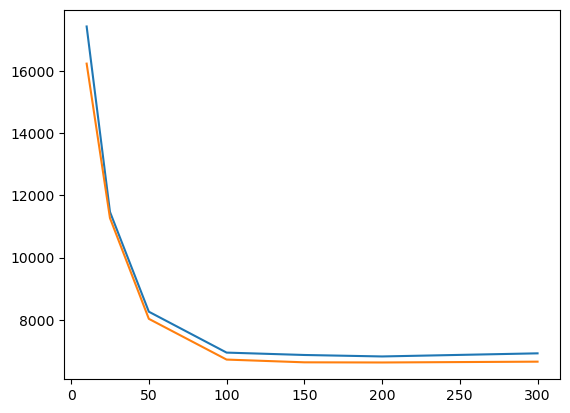

In [36]:
plt.plot(epochs_trial,training_loss, label='Training Losses')
plt.plot(epochs_trial,test_loss, label='Test Losses')

## 3. Example 2: ANN with ECFP and Molecular Weight data.

Used same ANN structure as Example 1

In [37]:
def get_model_example2():
    model = Sequential()
    model.add(Dense(32,input_shape=(33,),activation='relu'))
    model.add(Dense(3,activation='relu'))

    model.compile(loss='mse',optimizer='adam')
    return model

In [38]:
X_mol = ECFP_mol_weight.astype(float); y_mol= df[y_cols].astype(float)
X_mol_train, X_mol_test, y_mol_train, y_mol_test = train_test_split(X_mol, y_mol, test_size=0.20)

In [39]:
model_example2 = get_model_example2()
model_example2.fit(X_mol_train,y_mol_train,epochs=150)

Epoch 1/150
148/148 [==============================] - 1s 1ms/step - loss: 216770.1875
Epoch 2/150
148/148 [==============================] - 0s 1ms/step - loss: 209115.8438
Epoch 3/150
148/148 [==============================] - 0s 1ms/step - loss: 193267.6406
Epoch 4/150
148/148 [==============================] - 0s 2ms/step - loss: 169671.0625
Epoch 5/150
148/148 [==============================] - 0s 2ms/step - loss: 141600.6406
Epoch 6/150
148/148 [==============================] - 0s 2ms/step - loss: 112670.7500
Epoch 7/150
148/148 [==============================] - 0s 2ms/step - loss: 85957.2031
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 63365.0781
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 45856.6406
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 33373.1133
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 25158.4258
Epoch 12/150
148/148 [========================

148/148 [==============================] - 0s 2ms/step - loss: 3233.6897
Epoch 97/150
148/148 [==============================] - 0s 2ms/step - loss: 3230.1367
Epoch 98/150
148/148 [==============================] - 0s 2ms/step - loss: 3225.3862
Epoch 99/150
148/148 [==============================] - 0s 2ms/step - loss: 3224.9592
Epoch 100/150
148/148 [==============================] - 0s 2ms/step - loss: 3222.1611
Epoch 101/150
148/148 [==============================] - 0s 2ms/step - loss: 3219.5056
Epoch 102/150
148/148 [==============================] - 0s 2ms/step - loss: 3218.0649
Epoch 103/150
148/148 [==============================] - 0s 2ms/step - loss: 3214.3384
Epoch 104/150
148/148 [==============================] - 0s 2ms/step - loss: 3214.8193
Epoch 105/150
148/148 [==============================] - 0s 2ms/step - loss: 3213.6379
Epoch 106/150
148/148 [==============================] - 0s 2ms/step - loss: 3209.6672
Epoch 107/150
148/148 [==============================] - 0s 

In [40]:
model_example2.evaluate(X_mol_test,y_mol_test)

37/37 [==============================] - 0s 2ms/step - loss: 3473.3784


3473.37841796875

##### Adding the molecular weight seems to have helped performance by a significant margin!

Try Different Numbers of Epochs (graphing out testing set loss)

In [41]:
epochs_mol = [10,25,50,100,150,250,300,350,400,500,600,700]

In [42]:
test_loss = []
predictions_mol = []

for epoch in epochs_mol:
    model=get_model_example2()
    model.fit(X_mol_train,y_mol_train,epochs=epoch)
    evaluation = model.evaluate(X_mol_test,y_mol_test)
    predictions = model.predict(X_mol_test)
    
    test_loss.append(evaluation)
    predictions_mol.append(predictions)

Epoch 1/10
148/148 [==============================] - 1s 964us/step - loss: 216553.5781
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 208688.0312
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 191414.3125
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 166521.7969
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 137639.0000
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 107591.5469
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 79742.5625
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 57115.5664
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 40481.3320
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 25982.0918
Epoch 1/25
148/148 [==============================] - 1s 965us/step - loss: 216754.8906
Epoch 2/25
148/148 [==============================] - 0

148/148 [==============================] - 0s 2ms/step - loss: 45915.2266
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 33205.8203
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 24983.8262
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 19928.7500
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 16857.2051
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 14963.1543
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 13754.5068
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 12948.1670
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 12380.9717
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 11955.6826
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 11611.0273
Epoch 20/100
148/148 [==============================] - 

148/148 [==============================] - 0s 1ms/step - loss: 192758.5000
Epoch 4/150
148/148 [==============================] - 0s 1ms/step - loss: 171465.7500
Epoch 5/150
148/148 [==============================] - 0s 1ms/step - loss: 146097.2344
Epoch 6/150
148/148 [==============================] - 0s 1ms/step - loss: 118943.5547
Epoch 7/150
148/148 [==============================] - 0s 1ms/step - loss: 91233.3281
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 66901.2578
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 47904.3359
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 34288.6094
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 25114.4062
Epoch 12/150
148/148 [==============================] - 0s 2ms/step - loss: 19633.6172
Epoch 13/150
148/148 [==============================] - 0s 2ms/step - loss: 16501.0000
Epoch 14/150
148/148 [==============================] - 0s

148/148 [==============================] - 0s 2ms/step - loss: 3272.1860
Epoch 99/150
148/148 [==============================] - 0s 2ms/step - loss: 3267.6440
Epoch 100/150
148/148 [==============================] - 0s 2ms/step - loss: 3263.1179
Epoch 101/150
148/148 [==============================] - 0s 2ms/step - loss: 3258.9463
Epoch 102/150
148/148 [==============================] - 0s 2ms/step - loss: 3257.5281
Epoch 103/150
148/148 [==============================] - 0s 2ms/step - loss: 3253.3118
Epoch 104/150
148/148 [==============================] - 0s 2ms/step - loss: 3249.4375
Epoch 105/150
148/148 [==============================] - 0s 2ms/step - loss: 3247.0544
Epoch 106/150
148/148 [==============================] - 0s 2ms/step - loss: 3244.0576
Epoch 107/150
148/148 [==============================] - 0s 2ms/step - loss: 3239.8796
Epoch 108/150
148/148 [==============================] - 0s 2ms/step - loss: 3238.9395
Epoch 109/150
148/148 [==============================] - 0

148/148 [==============================] - 0s 2ms/step - loss: 7183.9346
Epoch 42/250
148/148 [==============================] - 0s 2ms/step - loss: 7028.6455
Epoch 43/250
148/148 [==============================] - 0s 2ms/step - loss: 6871.7944
Epoch 44/250
148/148 [==============================] - 0s 2ms/step - loss: 6708.1929
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 6548.0913
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 6389.6660
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 6235.8042
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 6083.4331
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 5935.4185
Epoch 50/250
148/148 [==============================] - 0s 2ms/step - loss: 5789.1484
Epoch 51/250
148/148 [==============================] - 0s 2ms/step - loss: 5648.2471
Epoch 52/250
148/148 [==============================] - 0s 2ms/step

Epoch 136/250
148/148 [==============================] - 0s 2ms/step - loss: 3213.3662
Epoch 137/250
148/148 [==============================] - 0s 2ms/step - loss: 3213.6777
Epoch 138/250
148/148 [==============================] - 0s 2ms/step - loss: 3214.4573
Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 3212.3059
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 3210.9055
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 3210.9614
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 3209.2366
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 3208.9214
Epoch 144/250
148/148 [==============================] - 0s 3ms/step - loss: 3208.9058
Epoch 145/250
148/148 [==============================] - 0s 2ms/step - loss: 3208.5864
Epoch 146/250
148/148 [==============================] - 0s 2ms/step - loss: 3205.5752
Epoch 147/250
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 3148.3667
Epoch 231/250
148/148 [==============================] - 0s 2ms/step - loss: 3146.5117
Epoch 232/250
148/148 [==============================] - 0s 2ms/step - loss: 3148.5596
Epoch 233/250
148/148 [==============================] - 0s 2ms/step - loss: 3146.7588
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 3145.7590
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 3144.8179
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 3144.6355
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 3143.3516
Epoch 238/250
148/148 [==============================] - 0s 2ms/step - loss: 3144.2668
Epoch 239/250
148/148 [==============================] - 0s 2ms/step - loss: 3140.5442
Epoch 240/250
148/148 [==============================] - 0s 2ms/step - loss: 3140.2161
Epoch 241/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3532.5520
Epoch 75/300
148/148 [==============================] - 0s 2ms/step - loss: 3502.8108
Epoch 76/300
148/148 [==============================] - 0s 2ms/step - loss: 3481.0376
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 3454.6614
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 3435.2781
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 3415.2974
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 3398.0146
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 3383.7600
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 3369.1616
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 3358.3960
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 3345.1426
Epoch 85/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3147.0923
Epoch 169/300
148/148 [==============================] - 0s 2ms/step - loss: 3145.9062
Epoch 170/300
148/148 [==============================] - 0s 2ms/step - loss: 3145.2322
Epoch 171/300
148/148 [==============================] - 0s 2ms/step - loss: 3143.0056
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 3143.9397
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 3140.8467
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 3141.7993
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 3140.3804
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 3137.7197
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 3138.6287
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 3138.3848
Epoch 179/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3050.1091
Epoch 263/300
148/148 [==============================] - 0s 2ms/step - loss: 3049.0552
Epoch 264/300
148/148 [==============================] - 0s 2ms/step - loss: 3048.4116
Epoch 265/300
148/148 [==============================] - 0s 2ms/step - loss: 3046.6331
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 3047.0872
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 3044.5967
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 3044.8267
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 3044.5601
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 3042.1748
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 3041.4727
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 3041.4214
Epoch 273/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 5172.5815
Epoch 56/350
148/148 [==============================] - 0s 2ms/step - loss: 5059.6616
Epoch 57/350
148/148 [==============================] - 0s 2ms/step - loss: 4949.0391
Epoch 58/350
148/148 [==============================] - 0s 2ms/step - loss: 4843.6841
Epoch 59/350
148/148 [==============================] - 0s 2ms/step - loss: 4735.8730
Epoch 60/350
148/148 [==============================] - 0s 2ms/step - loss: 4631.6328
Epoch 61/350
148/148 [==============================] - 0s 2ms/step - loss: 4536.0234
Epoch 62/350
148/148 [==============================] - 0s 2ms/step - loss: 4436.7900
Epoch 63/350
148/148 [==============================] - 0s 2ms/step - loss: 4349.5195
Epoch 64/350
148/148 [==============================] - 0s 2ms/step - loss: 4259.5752
Epoch 65/350
148/148 [==============================] - 0s 2ms/step - loss: 4178.4282
Epoch 66/350
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3178.0620
Epoch 150/350
148/148 [==============================] - 0s 2ms/step - loss: 3178.7073
Epoch 151/350
148/148 [==============================] - 0s 2ms/step - loss: 3176.7886
Epoch 152/350
148/148 [==============================] - 0s 2ms/step - loss: 3177.3101
Epoch 153/350
148/148 [==============================] - 0s 2ms/step - loss: 3174.4077
Epoch 154/350
148/148 [==============================] - 0s 2ms/step - loss: 3173.7437
Epoch 155/350
148/148 [==============================] - 0s 2ms/step - loss: 3172.3528
Epoch 156/350
148/148 [==============================] - 0s 2ms/step - loss: 3172.7830
Epoch 157/350
148/148 [==============================] - 0s 2ms/step - loss: 3169.3887
Epoch 158/350
148/148 [==============================] - 0s 2ms/step - loss: 3169.8921
Epoch 159/350
148/148 [==============================] - 0s 2ms/step - loss: 3165.8381
Epoch 160/350
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3079.0681
Epoch 244/350
148/148 [==============================] - 0s 2ms/step - loss: 3079.9480
Epoch 245/350
148/148 [==============================] - 0s 2ms/step - loss: 3078.7400
Epoch 246/350
148/148 [==============================] - 0s 2ms/step - loss: 3077.1506
Epoch 247/350
148/148 [==============================] - 0s 2ms/step - loss: 3076.7969
Epoch 248/350
148/148 [==============================] - 0s 2ms/step - loss: 3071.6001
Epoch 249/350
148/148 [==============================] - 0s 2ms/step - loss: 3075.6040
Epoch 250/350
148/148 [==============================] - 0s 2ms/step - loss: 3073.2700
Epoch 251/350
148/148 [==============================] - 0s 2ms/step - loss: 3073.2490
Epoch 252/350
148/148 [==============================] - 0s 2ms/step - loss: 3072.6001
Epoch 253/350
148/148 [==============================] - 0s 2ms/step - loss: 3069.8420
Epoch 254/350
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3004.3596
Epoch 338/350
148/148 [==============================] - 0s 2ms/step - loss: 3004.9041
Epoch 339/350
148/148 [==============================] - 0s 2ms/step - loss: 3002.1589
Epoch 340/350
148/148 [==============================] - 0s 2ms/step - loss: 3001.9158
Epoch 341/350
148/148 [==============================] - 0s 2ms/step - loss: 3003.1782
Epoch 342/350
148/148 [==============================] - 0s 2ms/step - loss: 3001.8845
Epoch 343/350
148/148 [==============================] - 0s 2ms/step - loss: 3001.4565
Epoch 344/350
148/148 [==============================] - 0s 2ms/step - loss: 2999.7083
Epoch 345/350
148/148 [==============================] - 0s 2ms/step - loss: 3000.6514
Epoch 346/350
148/148 [==============================] - 0s 2ms/step - loss: 2998.3174
Epoch 347/350
148/148 [==============================] - 0s 2ms/step - loss: 2998.6565
Epoch 348/350
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3382.8757
Epoch 82/400
148/148 [==============================] - 0s 2ms/step - loss: 3368.1553
Epoch 83/400
148/148 [==============================] - 0s 2ms/step - loss: 3356.3755
Epoch 84/400
148/148 [==============================] - 0s 2ms/step - loss: 3341.3677
Epoch 85/400
148/148 [==============================] - 0s 2ms/step - loss: 3337.3274
Epoch 86/400
148/148 [==============================] - 0s 2ms/step - loss: 3322.9429
Epoch 87/400
148/148 [==============================] - 0s 2ms/step - loss: 3314.1580
Epoch 88/400
148/148 [==============================] - 0s 2ms/step - loss: 3305.1055
Epoch 89/400
148/148 [==============================] - 0s 2ms/step - loss: 3299.7673
Epoch 90/400
148/148 [==============================] - 0s 2ms/step - loss: 3292.1355
Epoch 91/400
148/148 [==============================] - 0s 2ms/step - loss: 3283.8743
Epoch 92/400
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3169.3328
Epoch 176/400
148/148 [==============================] - 0s 2ms/step - loss: 3166.3186
Epoch 177/400
148/148 [==============================] - 0s 2ms/step - loss: 3165.7783
Epoch 178/400
148/148 [==============================] - 0s 2ms/step - loss: 3165.0044
Epoch 179/400
148/148 [==============================] - 0s 2ms/step - loss: 3167.0457
Epoch 180/400
148/148 [==============================] - 0s 2ms/step - loss: 3164.1680
Epoch 181/400
148/148 [==============================] - 0s 2ms/step - loss: 3162.4365
Epoch 182/400
148/148 [==============================] - 0s 2ms/step - loss: 3165.3101
Epoch 183/400
148/148 [==============================] - 0s 2ms/step - loss: 3162.8989
Epoch 184/400
148/148 [==============================] - 0s 2ms/step - loss: 3163.3921
Epoch 185/400
148/148 [==============================] - 0s 2ms/step - loss: 3161.0400
Epoch 186/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3096.8059
Epoch 270/400
148/148 [==============================] - 0s 2ms/step - loss: 3097.2769
Epoch 271/400
148/148 [==============================] - 0s 2ms/step - loss: 3095.7224
Epoch 272/400
148/148 [==============================] - 0s 2ms/step - loss: 3096.6829
Epoch 273/400
148/148 [==============================] - 0s 2ms/step - loss: 3094.8745
Epoch 274/400
148/148 [==============================] - 0s 2ms/step - loss: 3094.4126
Epoch 275/400
148/148 [==============================] - 0s 2ms/step - loss: 3094.4766
Epoch 276/400
148/148 [==============================] - 0s 2ms/step - loss: 3093.4182
Epoch 277/400
148/148 [==============================] - 0s 2ms/step - loss: 3090.0291
Epoch 278/400
148/148 [==============================] - 0s 2ms/step - loss: 3090.3918
Epoch 279/400
148/148 [==============================] - 0s 2ms/step - loss: 3090.0505
Epoch 280/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3032.1289
Epoch 364/400
148/148 [==============================] - 0s 2ms/step - loss: 3031.7063
Epoch 365/400
148/148 [==============================] - 0s 2ms/step - loss: 3032.8118
Epoch 366/400
148/148 [==============================] - 0s 2ms/step - loss: 3031.1355
Epoch 367/400
148/148 [==============================] - 0s 2ms/step - loss: 3030.4368
Epoch 368/400
148/148 [==============================] - 0s 2ms/step - loss: 3028.9414
Epoch 369/400
148/148 [==============================] - 0s 2ms/step - loss: 3028.5295
Epoch 370/400
148/148 [==============================] - 0s 2ms/step - loss: 3029.9526
Epoch 371/400
148/148 [==============================] - 0s 2ms/step - loss: 3028.2563
Epoch 372/400
148/148 [==============================] - 0s 2ms/step - loss: 3028.2000
Epoch 373/400
148/148 [==============================] - 0s 2ms/step - loss: 3028.7971
Epoch 374/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 5262.0654
Epoch 57/500
148/148 [==============================] - 0s 2ms/step - loss: 5132.9463
Epoch 58/500
148/148 [==============================] - 0s 2ms/step - loss: 5000.1738
Epoch 59/500
148/148 [==============================] - 0s 2ms/step - loss: 4872.7021
Epoch 60/500
148/148 [==============================] - 0s 2ms/step - loss: 4754.6074
Epoch 61/500
148/148 [==============================] - 0s 2ms/step - loss: 4640.5122
Epoch 62/500
148/148 [==============================] - 0s 2ms/step - loss: 4530.6357
Epoch 63/500
148/148 [==============================] - 0s 2ms/step - loss: 4430.8574
Epoch 64/500
148/148 [==============================] - 0s 2ms/step - loss: 4331.6167
Epoch 65/500
148/148 [==============================] - 0s 2ms/step - loss: 4243.1079
Epoch 66/500
148/148 [==============================] - 0s 2ms/step - loss: 4155.9185
Epoch 67/500
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3173.2268
Epoch 151/500
148/148 [==============================] - 0s 2ms/step - loss: 3172.4575
Epoch 152/500
148/148 [==============================] - 0s 2ms/step - loss: 3171.4260
Epoch 153/500
148/148 [==============================] - 0s 2ms/step - loss: 3170.7087
Epoch 154/500
148/148 [==============================] - 0s 2ms/step - loss: 3168.2893
Epoch 155/500
148/148 [==============================] - 0s 2ms/step - loss: 3167.0647
Epoch 156/500
148/148 [==============================] - 0s 2ms/step - loss: 3167.6067
Epoch 157/500
148/148 [==============================] - 0s 2ms/step - loss: 3165.0493
Epoch 158/500
148/148 [==============================] - 0s 2ms/step - loss: 3165.6541
Epoch 159/500
148/148 [==============================] - 0s 2ms/step - loss: 3163.8340
Epoch 160/500
148/148 [==============================] - 0s 2ms/step - loss: 3163.2341
Epoch 161/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3078.1055
Epoch 245/500
148/148 [==============================] - 0s 2ms/step - loss: 3079.0845
Epoch 246/500
148/148 [==============================] - 0s 2ms/step - loss: 3075.0242
Epoch 247/500
148/148 [==============================] - 0s 2ms/step - loss: 3076.1951
Epoch 248/500
148/148 [==============================] - 0s 2ms/step - loss: 3074.6538
Epoch 249/500
148/148 [==============================] - 0s 2ms/step - loss: 3075.1221
Epoch 250/500
148/148 [==============================] - 0s 2ms/step - loss: 3071.7517
Epoch 251/500
148/148 [==============================] - 0s 2ms/step - loss: 3072.0066
Epoch 252/500
148/148 [==============================] - 0s 2ms/step - loss: 3072.3469
Epoch 253/500
148/148 [==============================] - 0s 2ms/step - loss: 3073.1650
Epoch 254/500
148/148 [==============================] - 0s 2ms/step - loss: 3069.4111
Epoch 255/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3012.7419
Epoch 339/500
148/148 [==============================] - 0s 2ms/step - loss: 3010.9556
Epoch 340/500
148/148 [==============================] - 0s 2ms/step - loss: 3011.3860
Epoch 341/500
148/148 [==============================] - 0s 2ms/step - loss: 3007.9873
Epoch 342/500
148/148 [==============================] - 0s 2ms/step - loss: 3009.9377
Epoch 343/500
148/148 [==============================] - 0s 2ms/step - loss: 3010.0408
Epoch 344/500
148/148 [==============================] - 0s 2ms/step - loss: 3009.4058
Epoch 345/500
148/148 [==============================] - 0s 2ms/step - loss: 3009.1907
Epoch 346/500
148/148 [==============================] - 0s 2ms/step - loss: 3006.5171
Epoch 347/500
148/148 [==============================] - 0s 2ms/step - loss: 3006.0308
Epoch 348/500
148/148 [==============================] - 0s 2ms/step - loss: 3004.6367
Epoch 349/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2960.1108
Epoch 433/500
148/148 [==============================] - 0s 2ms/step - loss: 2957.4812
Epoch 434/500
148/148 [==============================] - 0s 2ms/step - loss: 2958.0286
Epoch 435/500
148/148 [==============================] - 0s 2ms/step - loss: 2958.8196
Epoch 436/500
148/148 [==============================] - 0s 2ms/step - loss: 2956.7925
Epoch 437/500
148/148 [==============================] - 0s 2ms/step - loss: 2959.4858
Epoch 438/500
148/148 [==============================] - 0s 2ms/step - loss: 2956.7107
Epoch 439/500
148/148 [==============================] - 0s 2ms/step - loss: 2957.2778
Epoch 440/500
148/148 [==============================] - 0s 2ms/step - loss: 2959.3301
Epoch 441/500
148/148 [==============================] - 0s 2ms/step - loss: 2955.6152
Epoch 442/500
148/148 [==============================] - 0s 2ms/step - loss: 2956.0073
Epoch 443/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 9933.1455
Epoch 26/600
148/148 [==============================] - 0s 2ms/step - loss: 9737.7529
Epoch 27/600
148/148 [==============================] - 0s 2ms/step - loss: 9550.7119
Epoch 28/600
148/148 [==============================] - 0s 2ms/step - loss: 9368.9766
Epoch 29/600
148/148 [==============================] - 0s 2ms/step - loss: 9192.1445
Epoch 30/600
148/148 [==============================] - 0s 2ms/step - loss: 9019.4180
Epoch 31/600
148/148 [==============================] - 0s 2ms/step - loss: 8845.7100
Epoch 32/600
148/148 [==============================] - 0s 2ms/step - loss: 8679.1777
Epoch 33/600
148/148 [==============================] - 0s 2ms/step - loss: 8510.6055
Epoch 34/600
148/148 [==============================] - 0s 2ms/step - loss: 8344.9268
Epoch 35/600
148/148 [==============================] - 0s 2ms/step - loss: 8179.4492
Epoch 36/600
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3261.0010
Epoch 121/600
148/148 [==============================] - 0s 2ms/step - loss: 3259.2830
Epoch 122/600
148/148 [==============================] - 0s 2ms/step - loss: 3256.2166
Epoch 123/600
148/148 [==============================] - 0s 2ms/step - loss: 3255.4114
Epoch 124/600
148/148 [==============================] - 0s 2ms/step - loss: 3254.5627
Epoch 125/600
148/148 [==============================] - 0s 2ms/step - loss: 3253.0022
Epoch 126/600
148/148 [==============================] - 0s 2ms/step - loss: 3250.5679
Epoch 127/600
148/148 [==============================] - 0s 2ms/step - loss: 3248.8499
Epoch 128/600
148/148 [==============================] - 0s 2ms/step - loss: 3250.3296
Epoch 129/600
148/148 [==============================] - 0s 2ms/step - loss: 3249.7119
Epoch 130/600
148/148 [==============================] - 0s 2ms/step - loss: 3248.1709
Epoch 131/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3210.6702
Epoch 215/600
148/148 [==============================] - 0s 2ms/step - loss: 3210.2417
Epoch 216/600
148/148 [==============================] - 0s 2ms/step - loss: 3213.7107
Epoch 217/600
148/148 [==============================] - 0s 2ms/step - loss: 3210.3628
Epoch 218/600
148/148 [==============================] - 0s 2ms/step - loss: 3211.4832
Epoch 219/600
148/148 [==============================] - 0s 2ms/step - loss: 3212.5679
Epoch 220/600
148/148 [==============================] - 0s 2ms/step - loss: 3210.2131
Epoch 221/600
148/148 [==============================] - 0s 2ms/step - loss: 3210.7795
Epoch 222/600
148/148 [==============================] - 0s 2ms/step - loss: 3210.9607
Epoch 223/600
148/148 [==============================] - 0s 2ms/step - loss: 3210.5356
Epoch 224/600
148/148 [==============================] - 0s 2ms/step - loss: 3210.7173
Epoch 225/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3190.7507
Epoch 309/600
148/148 [==============================] - 0s 2ms/step - loss: 3188.8718
Epoch 310/600
148/148 [==============================] - 0s 2ms/step - loss: 3190.4343
Epoch 311/600
148/148 [==============================] - 0s 2ms/step - loss: 3189.3740
Epoch 312/600
148/148 [==============================] - 0s 2ms/step - loss: 3192.4500
Epoch 313/600
148/148 [==============================] - 0s 2ms/step - loss: 3190.4084
Epoch 314/600
148/148 [==============================] - 0s 2ms/step - loss: 3191.1692
Epoch 315/600
148/148 [==============================] - 0s 2ms/step - loss: 3188.3711
Epoch 316/600
148/148 [==============================] - 0s 2ms/step - loss: 3188.6562
Epoch 317/600
148/148 [==============================] - 0s 2ms/step - loss: 3188.6912
Epoch 318/600
148/148 [==============================] - 0s 2ms/step - loss: 3191.5354
Epoch 319/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3170.5366
Epoch 403/600
148/148 [==============================] - 0s 2ms/step - loss: 3170.2261
Epoch 404/600
148/148 [==============================] - 0s 2ms/step - loss: 3168.6003
Epoch 405/600
148/148 [==============================] - 0s 3ms/step - loss: 3169.7871
Epoch 406/600
148/148 [==============================] - 0s 2ms/step - loss: 3171.7993
Epoch 407/600
148/148 [==============================] - 0s 2ms/step - loss: 3171.3291
Epoch 408/600
148/148 [==============================] - 0s 2ms/step - loss: 3168.7722
Epoch 409/600
148/148 [==============================] - 0s 2ms/step - loss: 3169.6426
Epoch 410/600
148/148 [==============================] - 0s 2ms/step - loss: 3167.2214
Epoch 411/600
148/148 [==============================] - 0s 2ms/step - loss: 3166.9373
Epoch 412/600
148/148 [==============================] - 0s 2ms/step - loss: 3167.2515
Epoch 413/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3155.4976
Epoch 497/600
148/148 [==============================] - 0s 2ms/step - loss: 3155.4500
Epoch 498/600
148/148 [==============================] - 0s 2ms/step - loss: 3154.9893
Epoch 499/600
148/148 [==============================] - 0s 2ms/step - loss: 3158.3689
Epoch 500/600
148/148 [==============================] - 1s 5ms/step - loss: 3156.4941
Epoch 501/600
148/148 [==============================] - 1s 4ms/step - loss: 3155.0981
Epoch 502/600
148/148 [==============================] - 1s 4ms/step - loss: 3155.9666
Epoch 503/600
148/148 [==============================] - 1s 5ms/step - loss: 3156.0518
Epoch 504/600
148/148 [==============================] - 0s 2ms/step - loss: 3153.0623
Epoch 505/600
148/148 [==============================] - 0s 2ms/step - loss: 3156.7502
Epoch 506/600
148/148 [==============================] - 0s 2ms/step - loss: 3155.7019
Epoch 507/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3150.7107
Epoch 591/600
148/148 [==============================] - 0s 2ms/step - loss: 3148.2563
Epoch 592/600
148/148 [==============================] - 0s 2ms/step - loss: 3149.4236
Epoch 593/600
148/148 [==============================] - 0s 2ms/step - loss: 3149.5698
Epoch 594/600
148/148 [==============================] - 0s 2ms/step - loss: 3149.0996
Epoch 595/600
148/148 [==============================] - 0s 2ms/step - loss: 3145.6128
Epoch 596/600
148/148 [==============================] - 0s 2ms/step - loss: 3146.5112
Epoch 597/600
148/148 [==============================] - 0s 2ms/step - loss: 3152.1582
Epoch 598/600
148/148 [==============================] - 0s 2ms/step - loss: 3148.6921
Epoch 599/600
148/148 [==============================] - 0s 2ms/step - loss: 3148.1145
Epoch 600/600
37/37 [==============================] - 0s 1ms/step - loss: 3427.5693
Epoch 1/700
148/148 [==============================] - 1s 8

148/148 [==============================] - 0s 2ms/step - loss: 3443.7134
Epoch 85/700
148/148 [==============================] - 0s 2ms/step - loss: 3427.2544
Epoch 86/700
148/148 [==============================] - 0s 2ms/step - loss: 3410.5325
Epoch 87/700
148/148 [==============================] - 0s 2ms/step - loss: 3397.7139
Epoch 88/700
148/148 [==============================] - 0s 2ms/step - loss: 3384.2876
Epoch 89/700
148/148 [==============================] - 0s 2ms/step - loss: 3372.3857
Epoch 90/700
148/148 [==============================] - 0s 2ms/step - loss: 3361.7065
Epoch 91/700
148/148 [==============================] - 0s 2ms/step - loss: 3352.9224
Epoch 92/700
148/148 [==============================] - 0s 2ms/step - loss: 3342.2776
Epoch 93/700
148/148 [==============================] - 0s 2ms/step - loss: 3334.7900
Epoch 94/700
148/148 [==============================] - 0s 2ms/step - loss: 3326.5273
Epoch 95/700
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3154.3899
Epoch 179/700
148/148 [==============================] - 0s 2ms/step - loss: 3152.1494
Epoch 180/700
148/148 [==============================] - 0s 2ms/step - loss: 3152.2869
Epoch 181/700
148/148 [==============================] - 0s 2ms/step - loss: 3151.4275
Epoch 182/700
148/148 [==============================] - 0s 2ms/step - loss: 3151.0454
Epoch 183/700
148/148 [==============================] - 0s 2ms/step - loss: 3149.0840
Epoch 184/700
148/148 [==============================] - 0s 2ms/step - loss: 3146.4158
Epoch 185/700
148/148 [==============================] - 0s 2ms/step - loss: 3147.0369
Epoch 186/700
148/148 [==============================] - 0s 2ms/step - loss: 3143.9580
Epoch 187/700
148/148 [==============================] - 0s 2ms/step - loss: 3143.9321
Epoch 188/700
148/148 [==============================] - 0s 2ms/step - loss: 3142.1516
Epoch 189/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3042.2156
Epoch 273/700
148/148 [==============================] - 0s 2ms/step - loss: 3039.2322
Epoch 274/700
148/148 [==============================] - 0s 2ms/step - loss: 3038.5876
Epoch 275/700
148/148 [==============================] - 0s 2ms/step - loss: 3037.3149
Epoch 276/700
148/148 [==============================] - 0s 2ms/step - loss: 3035.8103
Epoch 277/700
148/148 [==============================] - 0s 2ms/step - loss: 3034.0024
Epoch 278/700
148/148 [==============================] - 0s 2ms/step - loss: 3034.7219
Epoch 279/700
148/148 [==============================] - 0s 2ms/step - loss: 3031.8274
Epoch 280/700
148/148 [==============================] - 0s 2ms/step - loss: 3032.2771
Epoch 281/700
148/148 [==============================] - 0s 2ms/step - loss: 3031.1318
Epoch 282/700
148/148 [==============================] - 0s 2ms/step - loss: 3029.4277
Epoch 283/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2956.5305
Epoch 367/700
148/148 [==============================] - 0s 2ms/step - loss: 2956.1023
Epoch 368/700
148/148 [==============================] - 0s 2ms/step - loss: 2955.4089
Epoch 369/700
148/148 [==============================] - 0s 2ms/step - loss: 2954.0171
Epoch 370/700
148/148 [==============================] - 0s 2ms/step - loss: 2953.8604
Epoch 371/700
148/148 [==============================] - 0s 2ms/step - loss: 2952.3633
Epoch 372/700
148/148 [==============================] - 0s 2ms/step - loss: 2952.2441
Epoch 373/700
148/148 [==============================] - 0s 2ms/step - loss: 2951.1067
Epoch 374/700
148/148 [==============================] - 0s 2ms/step - loss: 2947.8408
Epoch 375/700
148/148 [==============================] - 0s 2ms/step - loss: 2951.0330
Epoch 376/700
148/148 [==============================] - 0s 2ms/step - loss: 2948.2766
Epoch 377/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2902.0476
Epoch 461/700
148/148 [==============================] - 0s 2ms/step - loss: 2902.9314
Epoch 462/700
148/148 [==============================] - 0s 2ms/step - loss: 2904.2549
Epoch 463/700
148/148 [==============================] - 0s 2ms/step - loss: 2901.4622
Epoch 464/700
148/148 [==============================] - 0s 2ms/step - loss: 2903.3928
Epoch 465/700
148/148 [==============================] - 0s 2ms/step - loss: 2902.5061
Epoch 466/700
148/148 [==============================] - 0s 2ms/step - loss: 2901.4792
Epoch 467/700
148/148 [==============================] - 0s 2ms/step - loss: 2900.3916
Epoch 468/700
148/148 [==============================] - 0s 2ms/step - loss: 2900.5796
Epoch 469/700
148/148 [==============================] - 0s 2ms/step - loss: 2897.5774
Epoch 470/700
148/148 [==============================] - 0s 2ms/step - loss: 2900.1482
Epoch 471/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2870.8093
Epoch 555/700
148/148 [==============================] - 0s 2ms/step - loss: 2870.3638
Epoch 556/700
148/148 [==============================] - 0s 2ms/step - loss: 2869.8887
Epoch 557/700
148/148 [==============================] - 0s 2ms/step - loss: 2867.9370
Epoch 558/700
148/148 [==============================] - 0s 2ms/step - loss: 2870.9158
Epoch 559/700
148/148 [==============================] - 0s 2ms/step - loss: 2868.4263
Epoch 560/700
148/148 [==============================] - 0s 2ms/step - loss: 2868.1594
Epoch 561/700
148/148 [==============================] - 0s 2ms/step - loss: 2867.7065
Epoch 562/700
148/148 [==============================] - 0s 2ms/step - loss: 2871.2417
Epoch 563/700
148/148 [==============================] - 0s 2ms/step - loss: 2868.8970
Epoch 564/700
148/148 [==============================] - 0s 2ms/step - loss: 2868.1804
Epoch 565/700
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 2851.4360
Epoch 649/700
148/148 [==============================] - 0s 2ms/step - loss: 2851.2266
Epoch 650/700
148/148 [==============================] - 0s 2ms/step - loss: 2850.3494
Epoch 651/700
148/148 [==============================] - 0s 2ms/step - loss: 2850.6401
Epoch 652/700
148/148 [==============================] - 0s 2ms/step - loss: 2851.0889
Epoch 653/700
148/148 [==============================] - 0s 2ms/step - loss: 2850.1248
Epoch 654/700
148/148 [==============================] - 0s 2ms/step - loss: 2848.9495
Epoch 655/700
148/148 [==============================] - 0s 2ms/step - loss: 2848.7939
Epoch 656/700
148/148 [==============================] - 0s 2ms/step - loss: 2849.0825
Epoch 657/700
148/148 [==============================] - 0s 2ms/step - loss: 2849.3230
Epoch 658/700
148/148 [==============================] - 0s 2ms/step - loss: 2850.1643
Epoch 659/700
148/148 [==============================] - 

In [43]:
test_loss

[25982.091796875,
 11260.43359375,
 6503.4609375,
 3636.463623046875,
 3491.4541015625,
 3423.929443359375,
 3320.760009765625,
 3291.538330078125,
 3345.989013671875,
 3252.853271484375,
 3427.5693359375,
 3186.88330078125]

In [44]:
predictions

array([[638.51996,   0.     , 457.5741 ],
       [690.8073 ,   0.     , 490.2453 ],
       [579.6809 ,   0.     , 398.16406],
       ...,
       [570.6228 ,   0.     , 381.91602],
       [799.99756,   0.     , 584.95874],
       [695.9658 ,   0.     , 487.61472]], dtype=float32)

In [45]:
perc_errors_mol = np.abs((y_mol_test-predictions)/y_mol_test)*100

In [46]:
perc_errors_mol.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.0,1180.000000
mean,8.713986,100.0,9.960905
std,14.359846,0.0,15.382709
min,0.025490,100.0,0.010357
25%,2.499055,100.0,2.902847
50%,5.550341,100.0,5.989479
75%,10.035893,100.0,11.586303
max,262.256227,100.0,248.959194


In [47]:
predictions_mol_df = pd.DataFrame(predictions, columns = y_cols)
predictions_mol_df.head()

,critical temperature (K),acentric factor,boiling point (K)
0,638.519958,0.0,457.574097
1,690.807312,0.0,490.245300
2,579.680908,0.0,398.164062
3,700.685242,0.0,505.072937
4,699.827209,0.0,505.185669


In [48]:
y_mol_test.head()

,critical temperature (K),acentric factor,boiling point (K)
3828,606.35,0.814,455.00
3659,751.00,0.569,523.65
2281,601.45,0.500,442.35
1091,618.90,0.739,447.15
1216,657.20,0.474,473.73


Since this model is not effective for Acentric factor, train a multi-output regression network for Critical Temperature and Boiling Point. Variables for this model type will be labeled with "final"

## 4. Multi-output ANN (Critical and Boiling temperatures only)

In [49]:
y_cols_final = ['critical temperature (K)','boiling point (K)']

In [50]:
X_final = ECFP_mol_weight.astype(float); y_final= df[y_cols_final].astype(float)
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.20)

In [51]:
def get_model(layer_dims,activations,n_input=33,loss_f='mse'):
    """Returns a compiled model using input layer_dims & activations. layer_dims = [512,256,2]
    Will return a layer with 2 hidden layers with 512,256 units and an output layer
    with 2 units"""
    model = Sequential()
    #First hidden layer
    model.add(Dense(layer_dims[0],input_shape=(n_input,),activation=activations[0]))
    
    #Other hidden layers
    for i in range(1,len(layer_dims)-1):
        model.add(Dense(layer_dims[i],activation=activations[i]))

    model.add(Dense(layer_dims[-1],activation=activations[-1]))

    model.compile(loss=loss_f,optimizer='adam')
    return model

In [52]:
layer_dims = [32,2]
activations = ['relu','relu']
trial_epochs = [10,25,50,75,100,150,200,300,400,500,600,750]
test_loss_final = []
for epoch in trial_epochs:  
    model = get_model(layer_dims,activations)
    model.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model.evaluate(X_final_test,y_final_test)
    
    test_loss_final.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 860us/step - loss: 327289.7500
Epoch 2/10
148/148 [==============================] - 0s 973us/step - loss: 315323.5000
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 289832.1875
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 251331.2812
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 206227.4375
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 161051.6250
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 120201.3125
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 86570.4375
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 61373.7031
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 36566.5977
Epoch 1/25
148/148 [==============================] - 1s 905us/step - loss: 327315.5938
Epoch 2/25
148/148 [==============================] 

148/148 [==============================] - 0s 2ms/step - loss: 102781.1016
Epoch 9/75
148/148 [==============================] - 0s 2ms/step - loss: 74895.3047
Epoch 10/75
148/148 [==============================] - 0s 2ms/step - loss: 54524.7812
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 40735.1172
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 32010.1758
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 26649.0391
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 23363.8418
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 21296.4316
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 19931.7656
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 18991.0820
Epoch 18/75
148/148 [==============================] - 0s 2ms/step - loss: 18301.5156
Epoch 19/75
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 14590.5557
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 14314.1221
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 14041.4648
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 13776.4023
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 13511.2725
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 13247.3975
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 12992.5957
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 12727.6572
Epoch 35/100
148/148 [==============================] - 0s 1ms/step - loss: 12472.3115
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 12219.2236
Epoch 37/100
148/148 [==============================] - 0s 2ms/step - loss: 11964.7793
Epoch 38/100
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 16850.0879
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 16459.9004
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 16093.5117
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 15747.5869
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 15417.2676
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 15100.0967
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 14795.9883
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 14498.6357
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 14210.3994
Epoch 30/150
148/148 [==============================] - 0s 2ms/step - loss: 13929.0449
Epoch 31/150
148/148 [==============================] - 0s 2ms/step - loss: 13650.5420
Epoch 32/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4858.9580
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 4855.3921
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 4853.2739
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 4849.6777
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 4844.8916
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 4843.1035
Epoch 121/150
148/148 [==============================] - 0s 2ms/step - loss: 4842.3140
Epoch 122/150
148/148 [==============================] - 0s 2ms/step - loss: 4840.2515
Epoch 123/150
148/148 [==============================] - 0s 2ms/step - loss: 4839.6030
Epoch 124/150
148/148 [==============================] - 0s 2ms/step - loss: 4835.3008
Epoch 125/150
148/148 [==============================] - 0s 2ms/step - loss: 4832.3755
Epoch 126/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 6904.7100
Epoch 59/200
148/148 [==============================] - 0s 2ms/step - loss: 6745.7646
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 6594.0845
Epoch 61/200
148/148 [==============================] - 0s 2ms/step - loss: 6447.3379
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 6315.9263
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 6191.9834
Epoch 64/200
148/148 [==============================] - 0s 2ms/step - loss: 6073.6016
Epoch 65/200
148/148 [==============================] - 0s 2ms/step - loss: 5964.0845
Epoch 66/200
148/148 [==============================] - 0s 2ms/step - loss: 5868.2686
Epoch 67/200
148/148 [==============================] - 0s 2ms/step - loss: 5773.7671
Epoch 68/200
148/148 [==============================] - 0s 2ms/step - loss: 5693.0073
Epoch 69/200
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 1s 4ms/step - loss: 4725.3735
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 4727.2676
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 4720.8184
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 4721.3838
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 4719.3574
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 4718.3311
Epoch 158/200
148/148 [==============================] - 0s 2ms/step - loss: 4718.4600
Epoch 159/200
148/148 [==============================] - 0s 2ms/step - loss: 4716.2612
Epoch 160/200
148/148 [==============================] - 0s 2ms/step - loss: 4711.1582
Epoch 161/200
148/148 [==============================] - 0s 2ms/step - loss: 4708.8120
Epoch 162/200
148/148 [==============================] - 0s 2ms/step - loss: 4706.2378
Epoch 163/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 117819.4609
Epoch 46/300
148/148 [==============================] - 0s 2ms/step - loss: 117651.9297
Epoch 47/300
148/148 [==============================] - 0s 2ms/step - loss: 117485.4922
Epoch 48/300
148/148 [==============================] - 0s 2ms/step - loss: 117325.5703
Epoch 49/300
148/148 [==============================] - 0s 2ms/step - loss: 117167.2578
Epoch 50/300
148/148 [==============================] - 0s 2ms/step - loss: 117014.5234
Epoch 51/300
148/148 [==============================] - 0s 2ms/step - loss: 116863.5938
Epoch 52/300
148/148 [==============================] - 0s 2ms/step - loss: 116715.9766
Epoch 53/300
148/148 [==============================] - 0s 2ms/step - loss: 116574.3594
Epoch 54/300
148/148 [==============================] - 0s 2ms/step - loss: 116434.8750
Epoch 55/300
148/148 [==============================] - 0s 2ms/step - loss: 116296.5859
Epoch 56/300
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 113935.8750
Epoch 138/300
148/148 [==============================] - 0s 2ms/step - loss: 113935.4453
Epoch 139/300
148/148 [==============================] - 0s 2ms/step - loss: 113934.7266
Epoch 140/300
148/148 [==============================] - 0s 2ms/step - loss: 113934.0781
Epoch 141/300
148/148 [==============================] - 0s 2ms/step - loss: 113932.3281
Epoch 142/300
148/148 [==============================] - 0s 2ms/step - loss: 113935.8516
Epoch 143/300
148/148 [==============================] - 0s 2ms/step - loss: 113931.9766
Epoch 144/300
148/148 [==============================] - 0s 2ms/step - loss: 113931.6094
Epoch 145/300
148/148 [==============================] - 0s 2ms/step - loss: 113929.9219
Epoch 146/300
148/148 [==============================] - 0s 2ms/step - loss: 113928.2188
Epoch 147/300
148/148 [==============================] - 0s 2ms/step - loss: 113927.3203
Epoch 148/300
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 113876.2969
Epoch 230/300
148/148 [==============================] - 0s 2ms/step - loss: 113875.6172
Epoch 231/300
148/148 [==============================] - 0s 2ms/step - loss: 113876.5312
Epoch 232/300
148/148 [==============================] - 0s 2ms/step - loss: 113874.8047
Epoch 233/300
148/148 [==============================] - 0s 2ms/step - loss: 113874.9297
Epoch 234/300
148/148 [==============================] - 0s 2ms/step - loss: 113871.7031
Epoch 235/300
148/148 [==============================] - 0s 2ms/step - loss: 113871.2266
Epoch 236/300
148/148 [==============================] - 0s 2ms/step - loss: 113871.4688
Epoch 237/300
148/148 [==============================] - 0s 2ms/step - loss: 113871.3047
Epoch 238/300
148/148 [==============================] - 0s 2ms/step - loss: 113871.1562
Epoch 239/300
148/148 [==============================] - 0s 2ms/step - loss: 113869.9688
Epoch 240/300
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 16764.3184
Epoch 21/400
148/148 [==============================] - 0s 2ms/step - loss: 16340.1172
Epoch 22/400
148/148 [==============================] - 0s 2ms/step - loss: 15947.6826
Epoch 23/400
148/148 [==============================] - 0s 2ms/step - loss: 15565.7490
Epoch 24/400
148/148 [==============================] - 0s 2ms/step - loss: 15194.9512
Epoch 25/400
148/148 [==============================] - 0s 2ms/step - loss: 14840.3105
Epoch 26/400
148/148 [==============================] - 0s 2ms/step - loss: 14501.2539
Epoch 27/400
148/148 [==============================] - 0s 2ms/step - loss: 14178.1055
Epoch 28/400
148/148 [==============================] - 0s 2ms/step - loss: 13855.1523
Epoch 29/400
148/148 [==============================] - 0s 2ms/step - loss: 13544.6494
Epoch 30/400
148/148 [==============================] - 0s 2ms/step - loss: 13238.0518
Epoch 31/400
148/148 [==============================] - 

Epoch 115/400
148/148 [==============================] - 0s 2ms/step - loss: 4820.2495
Epoch 116/400
148/148 [==============================] - 0s 1ms/step - loss: 4820.7065
Epoch 117/400
148/148 [==============================] - 0s 2ms/step - loss: 4814.0103
Epoch 118/400
148/148 [==============================] - 0s 2ms/step - loss: 4814.1074
Epoch 119/400
148/148 [==============================] - 0s 1ms/step - loss: 4810.9434
Epoch 120/400
148/148 [==============================] - 0s 2ms/step - loss: 4812.4922
Epoch 121/400
148/148 [==============================] - 0s 2ms/step - loss: 4809.0693
Epoch 122/400
148/148 [==============================] - 0s 2ms/step - loss: 4807.5581
Epoch 123/400
148/148 [==============================] - 0s 2ms/step - loss: 4804.0513
Epoch 124/400
148/148 [==============================] - 0s 2ms/step - loss: 4800.5850
Epoch 125/400
148/148 [==============================] - 0s 2ms/step - loss: 4800.0137
Epoch 126/400
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 4671.7881
Epoch 210/400
148/148 [==============================] - 0s 2ms/step - loss: 4670.0591
Epoch 211/400
148/148 [==============================] - 0s 2ms/step - loss: 4668.9346
Epoch 212/400
148/148 [==============================] - 0s 2ms/step - loss: 4666.3901
Epoch 213/400
148/148 [==============================] - 0s 2ms/step - loss: 4664.0552
Epoch 214/400
148/148 [==============================] - 0s 2ms/step - loss: 4665.5200
Epoch 215/400
148/148 [==============================] - 0s 2ms/step - loss: 4661.9590
Epoch 216/400
148/148 [==============================] - 0s 2ms/step - loss: 4662.6919
Epoch 217/400
148/148 [==============================] - 0s 2ms/step - loss: 4659.3340
Epoch 218/400
148/148 [==============================] - 0s 2ms/step - loss: 4657.4365
Epoch 219/400
148/148 [==============================] - 0s 2ms/step - loss: 4655.6240
Epoch 220/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4541.6729
Epoch 304/400
148/148 [==============================] - 0s 2ms/step - loss: 4542.0850
Epoch 305/400
148/148 [==============================] - 0s 2ms/step - loss: 4540.1934
Epoch 306/400
148/148 [==============================] - 0s 2ms/step - loss: 4538.1167
Epoch 307/400
148/148 [==============================] - 0s 2ms/step - loss: 4537.5674
Epoch 308/400
148/148 [==============================] - 0s 2ms/step - loss: 4536.7456
Epoch 309/400
148/148 [==============================] - 0s 2ms/step - loss: 4536.6748
Epoch 310/400
148/148 [==============================] - 0s 2ms/step - loss: 4536.4395
Epoch 311/400
148/148 [==============================] - 0s 2ms/step - loss: 4535.6318
Epoch 312/400
148/148 [==============================] - 0s 2ms/step - loss: 4531.4731
Epoch 313/400
148/148 [==============================] - 0s 2ms/step - loss: 4530.6797
Epoch 314/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4440.2803
Epoch 398/400
148/148 [==============================] - 0s 2ms/step - loss: 4442.5298
Epoch 399/400
148/148 [==============================] - 0s 2ms/step - loss: 4439.1362
Epoch 400/400
37/37 [==============================] - 0s 2ms/step - loss: 4816.3110
Epoch 1/500
148/148 [==============================] - 1s 1ms/step - loss: 327575.8438
Epoch 2/500
148/148 [==============================] - 0s 1ms/step - loss: 315300.2188
Epoch 3/500
148/148 [==============================] - 0s 1ms/step - loss: 290556.2188
Epoch 4/500
148/148 [==============================] - 0s 2ms/step - loss: 255176.6250
Epoch 5/500
148/148 [==============================] - 0s 2ms/step - loss: 214266.3750
Epoch 6/500
148/148 [==============================] - 0s 2ms/step - loss: 172206.0938
Epoch 7/500
148/148 [==============================] - 0s 2ms/step - loss: 132021.0781
Epoch 8/500
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 5003.2983
Epoch 92/500
148/148 [==============================] - 0s 2ms/step - loss: 4991.1597
Epoch 93/500
148/148 [==============================] - 0s 2ms/step - loss: 4980.8027
Epoch 94/500
148/148 [==============================] - 0s 2ms/step - loss: 4969.5498
Epoch 95/500
148/148 [==============================] - 0s 2ms/step - loss: 4963.0464
Epoch 96/500
148/148 [==============================] - 0s 2ms/step - loss: 4954.0146
Epoch 97/500
148/148 [==============================] - 0s 2ms/step - loss: 4942.1880
Epoch 98/500
148/148 [==============================] - 0s 2ms/step - loss: 4935.3311
Epoch 99/500
148/148 [==============================] - 0s 2ms/step - loss: 4928.1084
Epoch 100/500
148/148 [==============================] - 0s 2ms/step - loss: 4920.0649
Epoch 101/500
148/148 [==============================] - 0s 2ms/step - loss: 4914.0093
Epoch 102/500
148/148 [==============================] - 0s 2ms/s

148/148 [==============================] - 0s 2ms/step - loss: 4709.5474
Epoch 186/500
148/148 [==============================] - 0s 2ms/step - loss: 4713.0454
Epoch 187/500
148/148 [==============================] - 0s 2ms/step - loss: 4705.8486
Epoch 188/500
148/148 [==============================] - 0s 2ms/step - loss: 4704.3892
Epoch 189/500
148/148 [==============================] - 0s 2ms/step - loss: 4701.8174
Epoch 190/500
148/148 [==============================] - 0s 2ms/step - loss: 4698.6748
Epoch 191/500
148/148 [==============================] - 0s 2ms/step - loss: 4698.5176
Epoch 192/500
148/148 [==============================] - 0s 2ms/step - loss: 4694.7998
Epoch 193/500
148/148 [==============================] - 0s 2ms/step - loss: 4694.1685
Epoch 194/500
148/148 [==============================] - 0s 2ms/step - loss: 4696.1172
Epoch 195/500
148/148 [==============================] - 0s 2ms/step - loss: 4692.6997
Epoch 196/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4527.1777
Epoch 280/500
148/148 [==============================] - 0s 2ms/step - loss: 4528.0308
Epoch 281/500
148/148 [==============================] - 0s 2ms/step - loss: 4525.6768
Epoch 282/500
148/148 [==============================] - 0s 2ms/step - loss: 4523.9512
Epoch 283/500
148/148 [==============================] - 0s 2ms/step - loss: 4524.4087
Epoch 284/500
148/148 [==============================] - 0s 2ms/step - loss: 4518.2485
Epoch 285/500
148/148 [==============================] - 0s 2ms/step - loss: 4519.7285
Epoch 286/500
148/148 [==============================] - 1s 5ms/step - loss: 4516.7954
Epoch 287/500
148/148 [==============================] - 0s 3ms/step - loss: 4516.9878
Epoch 288/500
148/148 [==============================] - 0s 2ms/step - loss: 4513.1216
Epoch 289/500
148/148 [==============================] - 0s 2ms/step - loss: 4512.4370
Epoch 290/500
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4398.4053
Epoch 374/500
148/148 [==============================] - 0s 2ms/step - loss: 4396.1836
Epoch 375/500
148/148 [==============================] - 0s 2ms/step - loss: 4398.9204
Epoch 376/500
148/148 [==============================] - 0s 2ms/step - loss: 4394.7656
Epoch 377/500
148/148 [==============================] - 0s 2ms/step - loss: 4394.1562
Epoch 378/500
148/148 [==============================] - 0s 2ms/step - loss: 4391.2295
Epoch 379/500
148/148 [==============================] - 0s 2ms/step - loss: 4390.4985
Epoch 380/500
148/148 [==============================] - 0s 2ms/step - loss: 4391.5127
Epoch 381/500
148/148 [==============================] - 0s 2ms/step - loss: 4387.1011
Epoch 382/500
148/148 [==============================] - 1s 3ms/step - loss: 4386.7178
Epoch 383/500
148/148 [==============================] - 0s 2ms/step - loss: 4384.4062
Epoch 384/500
148/148 [==============================] - 

148/148 [==============================] - 0s 3ms/step - loss: 4306.8062
Epoch 468/500
148/148 [==============================] - 0s 3ms/step - loss: 4300.7832
Epoch 469/500
148/148 [==============================] - 1s 4ms/step - loss: 4299.0146
Epoch 470/500
148/148 [==============================] - 1s 4ms/step - loss: 4299.3179
Epoch 471/500
148/148 [==============================] - 0s 3ms/step - loss: 4296.9185
Epoch 472/500
148/148 [==============================] - 1s 3ms/step - loss: 4297.1094
Epoch 473/500
148/148 [==============================] - 1s 3ms/step - loss: 4296.0220
Epoch 474/500
148/148 [==============================] - 0s 3ms/step - loss: 4296.8296
Epoch 475/500
148/148 [==============================] - 1s 10ms/step - loss: 4295.9058
Epoch 476/500
148/148 [==============================] - 0s 3ms/step - loss: 4294.8188
Epoch 477/500
148/148 [==============================] - 0s 2ms/step - loss: 4291.0015
Epoch 478/500
148/148 [==============================] -

148/148 [==============================] - 0s 2ms/step - loss: 6433.6362
Epoch 61/600
148/148 [==============================] - 0s 2ms/step - loss: 6312.9365
Epoch 62/600
148/148 [==============================] - 0s 2ms/step - loss: 6196.9053
Epoch 63/600
148/148 [==============================] - 0s 2ms/step - loss: 6088.5225
Epoch 64/600
148/148 [==============================] - 0s 2ms/step - loss: 5989.2490
Epoch 65/600
148/148 [==============================] - 0s 2ms/step - loss: 5897.4595
Epoch 66/600
148/148 [==============================] - 0s 2ms/step - loss: 5810.7754
Epoch 67/600
148/148 [==============================] - 0s 2ms/step - loss: 5732.0283
Epoch 68/600
148/148 [==============================] - 0s 2ms/step - loss: 5656.8477
Epoch 69/600
148/148 [==============================] - 0s 2ms/step - loss: 5587.8140
Epoch 70/600
148/148 [==============================] - 0s 2ms/step - loss: 5525.8433
Epoch 71/600
148/148 [==============================] - 0s 3ms/step

148/148 [==============================] - 0s 3ms/step - loss: 4764.8853
Epoch 155/600
148/148 [==============================] - 0s 3ms/step - loss: 4763.0454
Epoch 156/600
148/148 [==============================] - 0s 2ms/step - loss: 4763.9409
Epoch 157/600
148/148 [==============================] - 0s 2ms/step - loss: 4757.3418
Epoch 158/600
148/148 [==============================] - 0s 2ms/step - loss: 4759.9697
Epoch 159/600
148/148 [==============================] - 0s 2ms/step - loss: 4758.3745
Epoch 160/600
148/148 [==============================] - 0s 2ms/step - loss: 4757.4062
Epoch 161/600
148/148 [==============================] - 0s 2ms/step - loss: 4752.8071
Epoch 162/600
148/148 [==============================] - 0s 2ms/step - loss: 4751.8340
Epoch 163/600
148/148 [==============================] - 0s 2ms/step - loss: 4745.3438
Epoch 164/600
148/148 [==============================] - 0s 2ms/step - loss: 4749.3936
Epoch 165/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4622.7510
Epoch 249/600
148/148 [==============================] - 0s 2ms/step - loss: 4621.9893
Epoch 250/600
148/148 [==============================] - 0s 2ms/step - loss: 4620.0894
Epoch 251/600
148/148 [==============================] - 0s 3ms/step - loss: 4622.0757
Epoch 252/600
148/148 [==============================] - 0s 3ms/step - loss: 4621.3481
Epoch 253/600
148/148 [==============================] - 0s 2ms/step - loss: 4615.1836
Epoch 254/600
148/148 [==============================] - 0s 2ms/step - loss: 4616.6313
Epoch 255/600
148/148 [==============================] - 0s 2ms/step - loss: 4610.4199
Epoch 256/600
148/148 [==============================] - 0s 3ms/step - loss: 4610.0112
Epoch 257/600
148/148 [==============================] - 0s 2ms/step - loss: 4608.9072
Epoch 258/600
148/148 [==============================] - 0s 2ms/step - loss: 4607.3081
Epoch 259/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4489.3550
Epoch 343/600
148/148 [==============================] - 0s 2ms/step - loss: 4485.5312
Epoch 344/600
148/148 [==============================] - 0s 2ms/step - loss: 4486.9355
Epoch 345/600
148/148 [==============================] - 0s 2ms/step - loss: 4483.7046
Epoch 346/600
148/148 [==============================] - 0s 2ms/step - loss: 4481.9619
Epoch 347/600
148/148 [==============================] - 0s 2ms/step - loss: 4481.3027
Epoch 348/600
148/148 [==============================] - 0s 2ms/step - loss: 4483.9912
Epoch 349/600
148/148 [==============================] - 0s 2ms/step - loss: 4479.2412
Epoch 350/600
148/148 [==============================] - 0s 2ms/step - loss: 4477.0117
Epoch 351/600
148/148 [==============================] - 0s 2ms/step - loss: 4476.2676
Epoch 352/600
148/148 [==============================] - 0s 2ms/step - loss: 4475.6284
Epoch 353/600
148/148 [==============================] - 

148/148 [==============================] - 1s 4ms/step - loss: 4398.0801
Epoch 437/600
148/148 [==============================] - 1s 4ms/step - loss: 4397.9390
Epoch 438/600
148/148 [==============================] - 0s 3ms/step - loss: 4401.7031
Epoch 439/600
148/148 [==============================] - 1s 4ms/step - loss: 4396.7559
Epoch 440/600
148/148 [==============================] - 0s 3ms/step - loss: 4395.9385
Epoch 441/600
148/148 [==============================] - 0s 2ms/step - loss: 4394.9316
Epoch 442/600
148/148 [==============================] - 0s 2ms/step - loss: 4394.8862
Epoch 443/600
148/148 [==============================] - 1s 4ms/step - loss: 4394.9644
Epoch 444/600
148/148 [==============================] - 0s 2ms/step - loss: 4393.4917
Epoch 445/600
148/148 [==============================] - 0s 2ms/step - loss: 4392.3027
Epoch 446/600
148/148 [==============================] - 0s 2ms/step - loss: 4391.1226
Epoch 447/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4343.2837
Epoch 531/600
148/148 [==============================] - 0s 2ms/step - loss: 4342.5464
Epoch 532/600
148/148 [==============================] - 0s 2ms/step - loss: 4341.0586
Epoch 533/600
148/148 [==============================] - 0s 2ms/step - loss: 4342.4126
Epoch 534/600
148/148 [==============================] - 0s 2ms/step - loss: 4344.2744
Epoch 535/600
148/148 [==============================] - 0s 2ms/step - loss: 4343.7451
Epoch 536/600
148/148 [==============================] - 0s 2ms/step - loss: 4340.8999
Epoch 537/600
148/148 [==============================] - 0s 2ms/step - loss: 4343.4307
Epoch 538/600
148/148 [==============================] - 0s 2ms/step - loss: 4339.3887
Epoch 539/600
148/148 [==============================] - 0s 2ms/step - loss: 4340.9131
Epoch 540/600
148/148 [==============================] - 0s 2ms/step - loss: 4338.5488
Epoch 541/600
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 16308.8525
Epoch 24/750
148/148 [==============================] - 0s 2ms/step - loss: 15968.8799
Epoch 25/750
148/148 [==============================] - 0s 2ms/step - loss: 15626.5420
Epoch 26/750
148/148 [==============================] - 0s 2ms/step - loss: 15295.6748
Epoch 27/750
148/148 [==============================] - 0s 2ms/step - loss: 14974.6201
Epoch 28/750
148/148 [==============================] - 0s 2ms/step - loss: 14666.4131
Epoch 29/750
148/148 [==============================] - 0s 2ms/step - loss: 14365.5811
Epoch 30/750
148/148 [==============================] - 0s 2ms/step - loss: 14074.0430
Epoch 31/750
148/148 [==============================] - 0s 2ms/step - loss: 13789.4453
Epoch 32/750
148/148 [==============================] - 0s 2ms/step - loss: 13507.3809
Epoch 33/750
148/148 [==============================] - 0s 2ms/step - loss: 13235.8027
Epoch 34/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4849.8828
Epoch 118/750
148/148 [==============================] - 0s 2ms/step - loss: 4843.3618
Epoch 119/750
148/148 [==============================] - 0s 2ms/step - loss: 4841.9521
Epoch 120/750
148/148 [==============================] - 0s 2ms/step - loss: 4838.7026
Epoch 121/750
148/148 [==============================] - 0s 2ms/step - loss: 4835.2778
Epoch 122/750
148/148 [==============================] - 0s 2ms/step - loss: 4829.6245
Epoch 123/750
148/148 [==============================] - 0s 2ms/step - loss: 4827.6396
Epoch 124/750
148/148 [==============================] - 0s 2ms/step - loss: 4827.1523
Epoch 125/750
148/148 [==============================] - 0s 2ms/step - loss: 4820.6865
Epoch 126/750
148/148 [==============================] - 0s 2ms/step - loss: 4820.0464
Epoch 127/750
148/148 [==============================] - 0s 2ms/step - loss: 4815.0903
Epoch 128/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4614.4175
Epoch 212/750
148/148 [==============================] - 0s 2ms/step - loss: 4610.4697
Epoch 213/750
148/148 [==============================] - 0s 2ms/step - loss: 4607.7612
Epoch 214/750
148/148 [==============================] - 0s 2ms/step - loss: 4606.1460
Epoch 215/750
148/148 [==============================] - 0s 2ms/step - loss: 4605.1670
Epoch 216/750
148/148 [==============================] - 0s 2ms/step - loss: 4603.9473
Epoch 217/750
148/148 [==============================] - 0s 2ms/step - loss: 4600.6396
Epoch 218/750
148/148 [==============================] - 0s 2ms/step - loss: 4596.0493
Epoch 219/750
148/148 [==============================] - 0s 2ms/step - loss: 4596.5332
Epoch 220/750
148/148 [==============================] - 0s 2ms/step - loss: 4255.3594
Epoch 532/750
148/148 [==============================] - 0s 2ms/step - loss: 4252.0430
Epoch 533/750
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4220.6582
Epoch 617/750
148/148 [==============================] - 0s 2ms/step - loss: 4221.2275
Epoch 618/750
148/148 [==============================] - 0s 2ms/step - loss: 4218.9004
Epoch 619/750
148/148 [==============================] - 0s 2ms/step - loss: 4218.2646
Epoch 620/750
148/148 [==============================] - 0s 2ms/step - loss: 4217.9399
Epoch 621/750
148/148 [==============================] - 0s 2ms/step - loss: 4217.9370
Epoch 622/750
148/148 [==============================] - 0s 2ms/step - loss: 4221.8833
Epoch 623/750
148/148 [==============================] - 0s 2ms/step - loss: 4216.0166
Epoch 624/750
148/148 [==============================] - 0s 3ms/step - loss: 4222.2188
Epoch 625/750
148/148 [==============================] - 0s 2ms/step - loss: 4219.3384
Epoch 626/750
148/148 [==============================] - 0s 2ms/step - loss: 4217.2300
Epoch 627/750
148/148 [==============================] - 

148/148 [==============================] - 0s 3ms/step - loss: 4198.6934
Epoch 711/750
148/148 [==============================] - 0s 2ms/step - loss: 4201.0249
Epoch 712/750
148/148 [==============================] - 0s 2ms/step - loss: 4197.8208
Epoch 713/750
148/148 [==============================] - 0s 2ms/step - loss: 4197.5083
Epoch 714/750
148/148 [==============================] - 0s 2ms/step - loss: 4200.9214
Epoch 715/750
148/148 [==============================] - 0s 2ms/step - loss: 4197.9883
Epoch 716/750
148/148 [==============================] - 0s 2ms/step - loss: 4198.2212
Epoch 717/750
148/148 [==============================] - 0s 2ms/step - loss: 4197.6909
Epoch 718/750
148/148 [==============================] - 0s 2ms/step - loss: 4195.9258
Epoch 719/750
148/148 [==============================] - 0s 2ms/step - loss: 4198.0918
Epoch 720/750
148/148 [==============================] - 0s 2ms/step - loss: 4194.5366
Epoch 721/750
148/148 [==============================] - 

In [53]:
test_loss_final

[36566.59765625,
 15294.203125,
 8556.2197265625,
 6008.2373046875,
 5280.92919921875,
 5085.732421875,
 4949.2060546875,
 111922.21875,
 4816.31103515625,
 4753.14892578125,
 4714.07666015625,
 4723.84423828125]

Even with increasing epochs, the test set loss seems to be constantly decreasing. Maybe a deeper neural network (or layers with more units) can be used. 

In [54]:
#Use epoch = 750
predictions_temps = model.predict(X_final_test)

In [55]:
perc_errors_temps = np.abs((y_final_test-predictions_temps)/y_final_test)*100

In [56]:
perc_errors_temps.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,9.167153,10.319558
std,15.985493,17.393006
min,0.002321,0.003546
25%,2.789789,2.588282
50%,5.426514,5.560817
75%,10.118717,12.095492
max,277.008563,249.251463


Try with a 3 layer network network

In [57]:
layer_dims2=[64,32,2]
activations2 = ['relu','relu','relu']
trial_epochs2 = [10,25,50,100,200,300,400]
test_loss_final2 = []
for epoch in trial_epochs2:  
    model2 = get_model(layer_dims2,activations2)
    model2.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model2.evaluate(X_final_test,y_final_test)
    
    test_loss_final2.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 1ms/step - loss: 307349.2500
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 96620.6328
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 18754.6016
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 16272.9326
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 14632.8291
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 13326.6133
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 12161.5029
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 11101.0820
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 10111.4883
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 9247.6689
Epoch 1/25
148/148 [==============================] - 2s 4ms/step - loss: 312136.0000
Epoch 2/25
148/148 [==============================] - 1s 3ms/step

148/148 [==============================] - 0s 2ms/step - loss: 11316.3076
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 10470.4658
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 9648.5439
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 8891.0928
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 8163.6772
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 7511.5425
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 6942.3242
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 6461.5640
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 6060.7358
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 5750.5923
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 5505.7837
Epoch 20/100
148/148 [==============================] - 0s 2ms/st

148/148 [==============================] - 0s 2ms/step - loss: 18464.6543
Epoch 4/200
148/148 [==============================] - 1s 4ms/step - loss: 15884.4766
Epoch 5/200
148/148 [==============================] - 0s 3ms/step - loss: 14295.6016
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 13056.8125
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 11962.0605
Epoch 8/200
148/148 [==============================] - 0s 2ms/step - loss: 10952.2402
Epoch 9/200
148/148 [==============================] - 0s 2ms/step - loss: 9981.4199
Epoch 10/200
148/148 [==============================] - 0s 2ms/step - loss: 9076.4609
Epoch 11/200
148/148 [==============================] - 0s 3ms/step - loss: 8227.0664
Epoch 12/200
148/148 [==============================] - 1s 4ms/step - loss: 7488.4194
Epoch 13/200
148/148 [==============================] - 0s 2ms/step - loss: 6853.3320
Epoch 14/200
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4856.9756
Epoch 99/200
148/148 [==============================] - 0s 2ms/step - loss: 4847.4600
Epoch 100/200
148/148 [==============================] - 0s 2ms/step - loss: 4858.1831
Epoch 101/200
148/148 [==============================] - 0s 2ms/step - loss: 4860.5088
Epoch 102/200
148/148 [==============================] - 0s 2ms/step - loss: 4859.7910
Epoch 103/200
148/148 [==============================] - 0s 2ms/step - loss: 4841.3242
Epoch 104/200
148/148 [==============================] - 0s 2ms/step - loss: 4845.9946
Epoch 105/200
148/148 [==============================] - 0s 2ms/step - loss: 4859.4385
Epoch 106/200
148/148 [==============================] - 0s 2ms/step - loss: 4856.6216
Epoch 107/200
148/148 [==============================] - 0s 2ms/step - loss: 4838.5732
Epoch 108/200
148/148 [==============================] - 0s 3ms/step - loss: 4836.9951
Epoch 109/200
148/148 [==============================] - 0

148/148 [==============================] - 0s 2ms/step - loss: 4796.8862
Epoch 193/200
148/148 [==============================] - 1s 3ms/step - loss: 4778.0464
Epoch 194/200
148/148 [==============================] - 0s 2ms/step - loss: 4771.1714
Epoch 195/200
148/148 [==============================] - 1s 4ms/step - loss: 4774.8013
Epoch 196/200
148/148 [==============================] - 0s 2ms/step - loss: 4761.7573
Epoch 197/200
148/148 [==============================] - 0s 2ms/step - loss: 4774.4883
Epoch 198/200
148/148 [==============================] - 0s 2ms/step - loss: 4777.0239
Epoch 199/200
148/148 [==============================] - 0s 2ms/step - loss: 4752.9253
Epoch 200/200
37/37 [==============================] - 0s 1ms/step - loss: 5061.8418
Epoch 1/300
148/148 [==============================] - 1s 1ms/step - loss: 313382.7188
Epoch 2/300
148/148 [==============================] - 0s 2ms/step - loss: 125726.5781
Epoch 3/300
148/148 [==============================] - 0s 2

148/148 [==============================] - 0s 2ms/step - loss: 4883.0039
Epoch 87/300
148/148 [==============================] - 0s 2ms/step - loss: 4863.0337
Epoch 88/300
148/148 [==============================] - 0s 2ms/step - loss: 4872.5059
Epoch 89/300
148/148 [==============================] - 0s 2ms/step - loss: 4873.7847
Epoch 90/300
148/148 [==============================] - 0s 2ms/step - loss: 4863.3105
Epoch 91/300
148/148 [==============================] - 0s 2ms/step - loss: 4867.7222
Epoch 92/300
148/148 [==============================] - 0s 2ms/step - loss: 4863.5527
Epoch 93/300
148/148 [==============================] - 0s 2ms/step - loss: 4868.8027
Epoch 94/300
148/148 [==============================] - 0s 2ms/step - loss: 4860.1748
Epoch 95/300
148/148 [==============================] - 0s 2ms/step - loss: 4860.7832
Epoch 96/300
148/148 [==============================] - 0s 2ms/step - loss: 4853.4912
Epoch 97/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4828.1934
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 4815.4268
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss: 4821.4077
Epoch 183/300
148/148 [==============================] - 0s 2ms/step - loss: 4819.6201
Epoch 184/300
148/148 [==============================] - 0s 2ms/step - loss: 4818.8765
Epoch 185/300
148/148 [==============================] - 0s 2ms/step - loss: 4816.3481
Epoch 186/300
148/148 [==============================] - 0s 2ms/step - loss: 4816.9028
Epoch 187/300
148/148 [==============================] - 0s 2ms/step - loss: 4827.6743
Epoch 188/300
148/148 [==============================] - 0s 2ms/step - loss: 4823.2593
Epoch 189/300
148/148 [==============================] - 0s 2ms/step - loss: 4816.7124
Epoch 190/300
148/148 [==============================] - 0s 2ms/step - loss: 4810.2837
Epoch 191/300
148/148 [==============================] - 

148/148 [==============================] - 1s 4ms/step - loss: 4774.2412
Epoch 275/300
148/148 [==============================] - 0s 3ms/step - loss: 4757.0581
Epoch 276/300
148/148 [==============================] - 0s 3ms/step - loss: 4761.2773
Epoch 277/300
148/148 [==============================] - 2s 11ms/step - loss: 4762.8979
Epoch 278/300
148/148 [==============================] - 1s 4ms/step - loss: 4768.1265
Epoch 279/300
148/148 [==============================] - 0s 3ms/step - loss: 4755.7495
Epoch 280/300
148/148 [==============================] - 0s 3ms/step - loss: 4765.0596
Epoch 281/300
148/148 [==============================] - 0s 3ms/step - loss: 4755.4858
Epoch 282/300
148/148 [==============================] - 0s 3ms/step - loss: 4766.9600
Epoch 283/300
148/148 [==============================] - 0s 2ms/step - loss: 4765.2690
Epoch 284/300
148/148 [==============================] - 0s 2ms/step - loss: 4760.0381
Epoch 285/300
148/148 [==============================] -

148/148 [==============================] - 0s 2ms/step - loss: 4853.1265
Epoch 69/400
148/148 [==============================] - 0s 2ms/step - loss: 4871.4136
Epoch 70/400
148/148 [==============================] - 0s 3ms/step - loss: 4882.2769
Epoch 71/400
148/148 [==============================] - 0s 2ms/step - loss: 4863.2988
Epoch 72/400
148/148 [==============================] - 0s 2ms/step - loss: 4860.3789
Epoch 73/400
148/148 [==============================] - 0s 2ms/step - loss: 4864.0088
Epoch 74/400
148/148 [==============================] - 0s 2ms/step - loss: 4872.8472
Epoch 75/400
148/148 [==============================] - 0s 2ms/step - loss: 4862.3794
Epoch 76/400
148/148 [==============================] - 0s 2ms/step - loss: 4850.5200
Epoch 77/400
148/148 [==============================] - 0s 2ms/step - loss: 4847.3477
Epoch 78/400
148/148 [==============================] - 0s 2ms/step - loss: 4857.4414
Epoch 79/400
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 1s 4ms/step - loss: 4776.5942
Epoch 163/400
148/148 [==============================] - 0s 3ms/step - loss: 4775.0327
Epoch 164/400
148/148 [==============================] - 0s 2ms/step - loss: 4776.3506
Epoch 165/400
148/148 [==============================] - 0s 3ms/step - loss: 4770.3164
Epoch 166/400
148/148 [==============================] - 0s 3ms/step - loss: 4775.6553
Epoch 167/400
148/148 [==============================] - 0s 2ms/step - loss: 4788.8892
Epoch 168/400
148/148 [==============================] - 0s 2ms/step - loss: 4771.8647
Epoch 169/400
148/148 [==============================] - 0s 2ms/step - loss: 4762.0420
Epoch 170/400
148/148 [==============================] - 0s 2ms/step - loss: 4774.6616
Epoch 171/400
148/148 [==============================] - 0s 3ms/step - loss: 4771.1177
Epoch 172/400
148/148 [==============================] - 0s 2ms/step - loss: 4767.4434
Epoch 173/400
148/148 [==============================] - 

148/148 [==============================] - 1s 4ms/step - loss: 4728.3892
Epoch 257/400
148/148 [==============================] - 1s 3ms/step - loss: 4731.6675
Epoch 258/400
148/148 [==============================] - 0s 3ms/step - loss: 4713.3091
Epoch 259/400
148/148 [==============================] - 0s 2ms/step - loss: 4717.2988
Epoch 260/400
148/148 [==============================] - 0s 3ms/step - loss: 4739.6265
Epoch 261/400
148/148 [==============================] - 0s 3ms/step - loss: 4726.7354
Epoch 262/400
148/148 [==============================] - 0s 2ms/step - loss: 4738.1499
Epoch 263/400
148/148 [==============================] - 0s 2ms/step - loss: 4719.9233
Epoch 264/400
148/148 [==============================] - 0s 3ms/step - loss: 4724.3149
Epoch 265/400
148/148 [==============================] - 0s 3ms/step - loss: 4718.6001
Epoch 266/400
148/148 [==============================] - 0s 2ms/step - loss: 4723.4907
Epoch 267/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4700.1499
Epoch 351/400
148/148 [==============================] - 0s 2ms/step - loss: 4682.7974
Epoch 352/400
148/148 [==============================] - 0s 2ms/step - loss: 4691.7173
Epoch 353/400
148/148 [==============================] - 0s 2ms/step - loss: 4692.4907
Epoch 354/400
148/148 [==============================] - 0s 2ms/step - loss: 4682.3145
Epoch 355/400
148/148 [==============================] - 0s 2ms/step - loss: 4695.2729
Epoch 356/400
148/148 [==============================] - 0s 2ms/step - loss: 4688.4634
Epoch 357/400
148/148 [==============================] - 0s 2ms/step - loss: 4687.3311
Epoch 358/400
148/148 [==============================] - 0s 2ms/step - loss: 4692.2661
Epoch 359/400
148/148 [==============================] - 0s 2ms/step - loss: 4697.6084
Epoch 360/400
148/148 [==============================] - 0s 2ms/step - loss: 4707.3628
Epoch 361/400
148/148 [==============================] - 

In [58]:
test_loss_final2

[9247.6689453125,
 5261.99853515625,
 5156.00732421875,
 5159.62548828125,
 5061.841796875,
 5024.3525390625,
 4987.01708984375]

At a very low number of epochs, the neural network seems to have the lowest test set loss. Experiment with lower complexity models:

In [59]:
layer_dims3=[32,16,2]
trial_epochs3 = [10,25,50,100,200,300,400]
activations3 = ['relu','relu','relu']
test_loss_final3 = []
for epoch in trial_epochs3:  
    model3 = get_model(layer_dims3,activations3)
    model3.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model3.evaluate(X_final_test,y_final_test)
    
    test_loss_final3.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 965us/step - loss: 325720.7812
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 269808.2188
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 119542.3359
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 27128.6348
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 18341.0469
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 16813.8164
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 15703.2236
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 14818.3115
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 14059.2754
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 13555.5928
Epoch 1/25
148/148 [==============================] - 1s 1ms/step - loss: 324700.4375
Epoch 2/25
148/148 [==============================] - 0s 1ms

148/148 [==============================] - 0s 2ms/step - loss: 12737.3994
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 11875.9004
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 11072.2471
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 10316.1719
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 9611.8496
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 8945.6592
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 8339.8779
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 7781.4863
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 7278.7739
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 6835.9502
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 6450.6279
Epoch 20/100
148/148 [==============================] - 0s 2ms/

148/148 [==============================] - 0s 1ms/step - loss: 85464.6719
Epoch 4/200
148/148 [==============================] - 0s 1ms/step - loss: 24036.0469
Epoch 5/200
148/148 [==============================] - 0s 1ms/step - loss: 19020.4746
Epoch 6/200
148/148 [==============================] - 0s 2ms/step - loss: 17275.7891
Epoch 7/200
148/148 [==============================] - 0s 2ms/step - loss: 16114.8555
Epoch 8/200
148/148 [==============================] - 0s 2ms/step - loss: 15178.5527
Epoch 9/200
148/148 [==============================] - 0s 2ms/step - loss: 14412.0713
Epoch 10/200
148/148 [==============================] - 0s 2ms/step - loss: 13712.0986
Epoch 11/200
148/148 [==============================] - 0s 2ms/step - loss: 13055.1426
Epoch 12/200
148/148 [==============================] - 0s 2ms/step - loss: 12435.1396
Epoch 13/200
148/148 [==============================] - 0s 2ms/step - loss: 11826.5420
Epoch 14/200
148/148 [==============================] - 0s 2ms

148/148 [==============================] - 0s 2ms/step - loss: 4837.6201
Epoch 99/200
148/148 [==============================] - 0s 2ms/step - loss: 4832.6001
Epoch 100/200
148/148 [==============================] - 0s 2ms/step - loss: 4841.4360
Epoch 101/200
148/148 [==============================] - 0s 2ms/step - loss: 4832.0654
Epoch 102/200
148/148 [==============================] - 0s 2ms/step - loss: 4833.7373
Epoch 103/200
148/148 [==============================] - 0s 2ms/step - loss: 4839.0620
Epoch 104/200
148/148 [==============================] - 0s 2ms/step - loss: 4842.3350
Epoch 105/200
148/148 [==============================] - 0s 2ms/step - loss: 4832.6899
Epoch 106/200
148/148 [==============================] - 0s 2ms/step - loss: 4832.8472
Epoch 107/200
148/148 [==============================] - 0s 2ms/step - loss: 4833.7632
Epoch 108/200
148/148 [==============================] - 0s 2ms/step - loss: 4834.4800
Epoch 109/200
148/148 [==============================] - 0

148/148 [==============================] - 0s 2ms/step - loss: 4793.7144
Epoch 193/200
148/148 [==============================] - 0s 2ms/step - loss: 4804.1250
Epoch 194/200
148/148 [==============================] - 0s 2ms/step - loss: 4791.1753
Epoch 195/200
148/148 [==============================] - 0s 2ms/step - loss: 4798.2349
Epoch 196/200
148/148 [==============================] - 0s 2ms/step - loss: 4810.9619
Epoch 197/200
148/148 [==============================] - 0s 2ms/step - loss: 4790.6973
Epoch 198/200
148/148 [==============================] - 0s 2ms/step - loss: 4792.2578
Epoch 199/200
148/148 [==============================] - 0s 2ms/step - loss: 4787.8916
Epoch 200/200
37/37 [==============================] - 0s 1ms/step - loss: 5106.6221
Epoch 1/300
148/148 [==============================] - 1s 954us/step - loss: 325123.7500
Epoch 2/300
148/148 [==============================] - 0s 1ms/step - loss: 253212.3125
Epoch 3/300
148/148 [==============================] - 0s

148/148 [==============================] - 0s 2ms/step - loss: 4862.0410
Epoch 87/300
148/148 [==============================] - 0s 2ms/step - loss: 4858.9922
Epoch 88/300
148/148 [==============================] - 0s 2ms/step - loss: 4862.7046
Epoch 89/300
148/148 [==============================] - 0s 2ms/step - loss: 4868.3887
Epoch 90/300
148/148 [==============================] - 0s 2ms/step - loss: 4868.5166
Epoch 91/300
148/148 [==============================] - 0s 2ms/step - loss: 4862.5947
Epoch 92/300
148/148 [==============================] - 0s 2ms/step - loss: 4875.9111
Epoch 93/300
148/148 [==============================] - 0s 2ms/step - loss: 4865.0405
Epoch 94/300
148/148 [==============================] - 0s 2ms/step - loss: 4860.8926
Epoch 95/300
148/148 [==============================] - 0s 2ms/step - loss: 4859.1543
Epoch 96/300
148/148 [==============================] - 0s 2ms/step - loss: 4874.3599
Epoch 97/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4835.3662
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 4832.1489
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss: 4829.3345
Epoch 183/300
148/148 [==============================] - 0s 2ms/step - loss: 4830.9326
Epoch 184/300
148/148 [==============================] - 0s 2ms/step - loss: 4838.5176
Epoch 185/300
148/148 [==============================] - 0s 2ms/step - loss: 4830.0947
Epoch 186/300
148/148 [==============================] - 0s 2ms/step - loss: 4830.1025
Epoch 187/300
148/148 [==============================] - 0s 2ms/step - loss: 4833.2847
Epoch 188/300
148/148 [==============================] - 0s 2ms/step - loss: 4837.1221
Epoch 189/300
148/148 [==============================] - 0s 2ms/step - loss: 4832.7681
Epoch 190/300
148/148 [==============================] - 0s 2ms/step - loss: 4830.8198
Epoch 191/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4791.6470
Epoch 275/300
148/148 [==============================] - 0s 2ms/step - loss: 4789.7305
Epoch 276/300
148/148 [==============================] - 0s 2ms/step - loss: 4808.9121
Epoch 277/300
148/148 [==============================] - 0s 2ms/step - loss: 4788.9487
Epoch 278/300
148/148 [==============================] - 0s 2ms/step - loss: 4799.1401
Epoch 279/300
148/148 [==============================] - 0s 2ms/step - loss: 4792.8149
Epoch 280/300
148/148 [==============================] - 0s 2ms/step - loss: 4780.0649
Epoch 281/300
148/148 [==============================] - 0s 2ms/step - loss: 4791.3843
Epoch 282/300
148/148 [==============================] - 0s 2ms/step - loss: 4795.1406
Epoch 283/300
148/148 [==============================] - 0s 2ms/step - loss: 4783.1646
Epoch 284/300
148/148 [==============================] - 0s 2ms/step - loss: 4792.3345
Epoch 285/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4880.8799
Epoch 69/400
148/148 [==============================] - 0s 2ms/step - loss: 4873.4688
Epoch 70/400
148/148 [==============================] - 0s 2ms/step - loss: 4885.4648
Epoch 71/400
148/148 [==============================] - 0s 2ms/step - loss: 4872.6792
Epoch 72/400
148/148 [==============================] - 0s 2ms/step - loss: 4878.3345
Epoch 73/400
148/148 [==============================] - 0s 2ms/step - loss: 4873.1890
Epoch 74/400
148/148 [==============================] - 0s 2ms/step - loss: 4872.9497
Epoch 75/400
148/148 [==============================] - 0s 2ms/step - loss: 4872.1660
Epoch 76/400
148/148 [==============================] - 0s 2ms/step - loss: 4878.0537
Epoch 77/400
148/148 [==============================] - 0s 2ms/step - loss: 4873.2134
Epoch 78/400
148/148 [==============================] - 0s 2ms/step - loss: 4877.2354
Epoch 79/400
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4846.3335
Epoch 163/400
148/148 [==============================] - 0s 2ms/step - loss: 4847.2769
Epoch 164/400
148/148 [==============================] - 0s 2ms/step - loss: 4855.5923
Epoch 165/400
148/148 [==============================] - 0s 2ms/step - loss: 4853.3257
Epoch 166/400
148/148 [==============================] - 0s 2ms/step - loss: 4846.9604
Epoch 167/400
148/148 [==============================] - 0s 2ms/step - loss: 4852.7393
Epoch 168/400
148/148 [==============================] - 0s 2ms/step - loss: 4849.3931
Epoch 169/400
148/148 [==============================] - 0s 2ms/step - loss: 4842.6138
Epoch 170/400
148/148 [==============================] - 0s 2ms/step - loss: 4841.1670
Epoch 171/400
148/148 [==============================] - 0s 2ms/step - loss: 4849.5312
Epoch 172/400
148/148 [==============================] - 0s 2ms/step - loss: 4850.3950
Epoch 173/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4823.0562
Epoch 257/400
148/148 [==============================] - 0s 2ms/step - loss: 4814.8506
Epoch 258/400
148/148 [==============================] - 0s 2ms/step - loss: 4815.4287
Epoch 259/400
148/148 [==============================] - 0s 2ms/step - loss: 4811.5112
Epoch 260/400
148/148 [==============================] - 0s 2ms/step - loss: 4821.8872
Epoch 261/400
148/148 [==============================] - 0s 2ms/step - loss: 4813.6274
Epoch 262/400
148/148 [==============================] - 0s 2ms/step - loss: 4845.6357
Epoch 263/400
148/148 [==============================] - 0s 2ms/step - loss: 4814.7520
Epoch 264/400
148/148 [==============================] - 0s 2ms/step - loss: 4811.3594
Epoch 265/400
148/148 [==============================] - 0s 2ms/step - loss: 4808.1782
Epoch 266/400
148/148 [==============================] - 0s 2ms/step - loss: 4813.0850
Epoch 267/400
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4768.1733
Epoch 351/400
148/148 [==============================] - 0s 2ms/step - loss: 4761.1035
Epoch 352/400
148/148 [==============================] - 0s 2ms/step - loss: 4762.9258
Epoch 353/400
148/148 [==============================] - 0s 2ms/step - loss: 4757.3301
Epoch 354/400
148/148 [==============================] - 0s 2ms/step - loss: 4766.9160
Epoch 355/400
148/148 [==============================] - 0s 2ms/step - loss: 4762.2056
Epoch 356/400
148/148 [==============================] - 0s 2ms/step - loss: 4774.7856
Epoch 357/400
148/148 [==============================] - 0s 2ms/step - loss: 4756.4844
Epoch 358/400
148/148 [==============================] - 0s 2ms/step - loss: 4762.5068
Epoch 359/400
148/148 [==============================] - 0s 2ms/step - loss: 4763.4663
Epoch 360/400
148/148 [==============================] - 0s 2ms/step - loss: 4755.8477
Epoch 361/400
148/148 [==============================] - 

In [60]:
test_loss_final3

[13555.5927734375,
 6132.421875,
 5181.92138671875,
 5132.15771484375,
 5106.6220703125,
 5102.63427734375,
 5018.5078125]

In [61]:
model = get_model(layer_dims3, activations3)
model.fit(X_final_train,y_final_train,epochs = 50)
model.evaluate(X_final_test,y_final_test)

Epoch 1/50
148/148 [==============================] - 1s 972us/step - loss: 322997.9375
Epoch 2/50
148/148 [==============================] - 0s 1ms/step - loss: 241384.7344
Epoch 3/50
148/148 [==============================] - 0s 1ms/step - loss: 70997.2969
Epoch 4/50
148/148 [==============================] - 0s 1ms/step - loss: 20405.0957
Epoch 5/50
148/148 [==============================] - 0s 2ms/step - loss: 17817.9805
Epoch 6/50
148/148 [==============================] - 0s 2ms/step - loss: 16413.9668
Epoch 7/50
148/148 [==============================] - 0s 2ms/step - loss: 15364.1133
Epoch 8/50
148/148 [==============================] - 0s 2ms/step - loss: 14506.1406
Epoch 9/50
148/148 [==============================] - 0s 2ms/step - loss: 13724.4209
Epoch 10/50
148/148 [==============================] - 0s 2ms/step - loss: 12933.6709
Epoch 11/50
148/148 [==============================] - 0s 2ms/step - loss: 12162.6826
Epoch 12/50
148/148 [==============================] - 0s 2

5203.25

In [62]:
predictions_temps2 = model.predict(X_final_test)

In [63]:
perc_errors_temps2 =  np.abs((y_final_test-predictions_temps2)/y_final_test)*100

In [64]:
perc_errors_temps2.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,9.529431,12.105115
std,16.410610,20.926011
min,0.003404,0.000809
25%,2.751726,2.973160
50%,5.799602,7.672246
75%,10.762106,13.896178
max,278.176505,339.007165


In [65]:
layer_dims4=[64,2]
trial_epochs4 = [10,25,50,75,100,150,200,250,300]
activations4 = ['relu','relu']
test_loss_final4 = []
evaluation_best = 100000

for epoch in trial_epochs4:  
    model4 = get_model(layer_dims4,activations4)
    model4.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model4.evaluate(X_final_test,y_final_test)
    
    if evaluation_best > evaluation:
        best_model4 = model4
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')

    test_loss_final4.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 957us/step - loss: 326277.2812
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 303480.9375
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 257677.5625
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 198131.9688
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 138451.2188
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 89807.7969
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 56269.9102
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 36945.8086
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 27332.9434
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 21464.1562

 updated Model! Loss 21464.15625 

Epoch 1/25
148/148 [==============================] - 1s 891us/step - loss: 326059.3438
Epoch 2/25
148/148 [

148/148 [==============================] - 0s 1ms/step - loss: 47151.9141
Epoch 8/75
148/148 [==============================] - 0s 2ms/step - loss: 31770.3594
Epoch 9/75
148/148 [==============================] - 0s 1ms/step - loss: 24610.3398
Epoch 10/75
148/148 [==============================] - 0s 2ms/step - loss: 21219.4746
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 19441.8789
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 18373.4629
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 17633.7051
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 17055.1777
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 16557.2090
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 16108.3691
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 15699.5869
Epoch 18/75
148/148 [==============================] - 0s 2ms/step -

148/148 [==============================] - 0s 2ms/step - loss: 12550.1133
Epoch 27/100
148/148 [==============================] - 0s 2ms/step - loss: 12239.1846
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 11926.9805
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 11601.4707
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 11276.5029
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 10963.7207
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 10644.3691
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 10334.4902
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 10024.7354
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 9719.5771
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 9422.3672
Epoch 37/100
148/148 [==============================] - 0s

148/148 [==============================] - 0s 2ms/step - loss: 14778.7744
Epoch 20/150
148/148 [==============================] - 0s 2ms/step - loss: 14380.0488
Epoch 21/150
148/148 [==============================] - 0s 2ms/step - loss: 13983.9395
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 13597.0391
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 13221.7002
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 12854.6855
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 12491.0449
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 12135.9736
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 11781.5703
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 11438.3594
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 11099.0117
Epoch 30/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4745.0420
Epoch 115/150
148/148 [==============================] - 0s 2ms/step - loss: 4743.1025
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 4745.7612
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 4735.4849
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 4730.0742
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 4730.7710
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 4728.2188
Epoch 121/150
148/148 [==============================] - 0s 2ms/step - loss: 4725.5151
Epoch 122/150
148/148 [==============================] - 0s 2ms/step - loss: 4719.9551
Epoch 123/150
148/148 [==============================] - 0s 2ms/step - loss: 4716.0884
Epoch 124/150
148/148 [==============================] - 0s 2ms/step - loss: 4713.0811
Epoch 125/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 5283.8750
Epoch 58/200
148/148 [==============================] - 0s 2ms/step - loss: 5235.5103
Epoch 59/200
148/148 [==============================] - 0s 2ms/step - loss: 5196.9185
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 5154.0005
Epoch 61/200
148/148 [==============================] - 0s 2ms/step - loss: 5120.2383
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 5089.4614
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 5069.1392
Epoch 64/200
148/148 [==============================] - 0s 2ms/step - loss: 5041.1035
Epoch 65/200
148/148 [==============================] - 0s 2ms/step - loss: 5020.6274
Epoch 66/200
148/148 [==============================] - 0s 2ms/step - loss: 5003.3159
Epoch 67/200
148/148 [==============================] - 0s 2ms/step - loss: 4989.5562
Epoch 68/200
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4686.8564
Epoch 152/200
148/148 [==============================] - 0s 2ms/step - loss: 4685.9204
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 4684.3057
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 4678.3188
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 4679.6865
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 4676.9087
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 4671.7935
Epoch 158/200
148/148 [==============================] - 0s 2ms/step - loss: 4667.5112
Epoch 159/200
148/148 [==============================] - 0s 2ms/step - loss: 4670.4312
Epoch 160/200
148/148 [==============================] - 0s 2ms/step - loss: 4665.6240
Epoch 161/200
148/148 [==============================] - 0s 2ms/step - loss: 4660.4229
Epoch 162/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 7375.0117
Epoch 45/250
148/148 [==============================] - 0s 3ms/step - loss: 7158.5830
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 6953.0122
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 6766.9575
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 6594.0283
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 6423.2271
Epoch 50/250
148/148 [==============================] - 0s 2ms/step - loss: 6272.6245
Epoch 51/250
148/148 [==============================] - 0s 2ms/step - loss: 6134.0596
Epoch 52/250
148/148 [==============================] - 0s 2ms/step - loss: 6004.0654
Epoch 53/250
148/148 [==============================] - 0s 2ms/step - loss: 5885.7793
Epoch 54/250
148/148 [==============================] - 0s 2ms/step - loss: 5785.1333
Epoch 55/250
148/148 [==============================] - 0s 2ms/step

Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 4683.6836
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 4682.0693
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 4676.9131
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 4681.3594
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 4672.0918
Epoch 144/250
148/148 [==============================] - 0s 3ms/step - loss: 4668.2549
Epoch 145/250
148/148 [==============================] - 0s 2ms/step - loss: 4668.8818
Epoch 146/250
148/148 [==============================] - 0s 2ms/step - loss: 4667.1934
Epoch 147/250
148/148 [==============================] - 0s 2ms/step - loss: 4665.3569
Epoch 148/250
148/148 [==============================] - 0s 2ms/step - loss: 4660.6436
Epoch 149/250
148/148 [==============================] - 0s 2ms/step - loss: 4658.7812
Epoch 150/250
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 4457.6362
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 4460.3091
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 4452.3472
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 4456.5830
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 4448.8188
Epoch 238/250
148/148 [==============================] - 0s 2ms/step - loss: 4448.0664
Epoch 239/250
148/148 [==============================] - 0s 3ms/step - loss: 4447.6748
Epoch 240/250
148/148 [==============================] - 0s 2ms/step - loss: 4445.2446
Epoch 241/250
148/148 [==============================] - 0s 2ms/step - loss: 4439.1201
Epoch 242/250
148/148 [==============================] - 0s 2ms/step - loss: 4443.3740
Epoch 243/250
148/148 [==============================] - 0s 2ms/step - loss: 4440.1885
Epoch 244/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4881.2593
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 4878.5273
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 4869.1299
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 4861.8804
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 4854.3379
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 4851.2676
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 4845.6074
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 4840.7549
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 4836.9761
Epoch 85/300
148/148 [==============================] - 0s 2ms/step - loss: 4833.5605
Epoch 86/300
148/148 [==============================] - 0s 2ms/step - loss: 4831.1411
Epoch 87/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 4583.8291
Epoch 171/300
148/148 [==============================] - 0s 2ms/step - loss: 4580.2681
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 4576.7544
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 4572.6250
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 4572.1494
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 4570.3608
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 4566.5835
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 4565.2930
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 4559.7222
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 4557.8584
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 4556.2847
Epoch 181/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4383.6753
Epoch 265/300
148/148 [==============================] - 0s 2ms/step - loss: 4384.6221
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 4384.7310
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 4380.0073
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 4377.1909
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 4378.5801
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 4379.6743
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 4376.3452
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 4374.8896
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 4373.3501
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 4368.0884
Epoch 275/300
148/148 [==============================] - 

In [66]:
predictions4 = best_model4.predict(X_final_test)
perc_errors4 = np.abs((y_final_test-predictions4)/y_final_test)*100
perc_errors4.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,9.208651,10.610540
std,16.144360,18.409378
min,0.002479,0.012657
25%,2.723818,2.565738
50%,5.392271,5.861214
75%,10.281074,11.981243
max,283.515612,298.514186


Still stuck at the same error ranges! My intial thought was to use a slightly different activation function for the first layer

In [67]:
layer_dims5=[64,2]
trial_epochs5 = [10,25,50,75,100,150,200,250,300]
activations5 = ['tanh','relu']
test_loss_final5 = []
evaluation_best = 1000000
for epoch in trial_epochs5:  
    model5 = get_model(layer_dims5,activations5)
    model5.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model5.evaluate(X_final_test,y_final_test)
    
    if evaluation_best > evaluation:
        best_model5 = model5
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')
        
    test_loss_final5.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 986us/step - loss: 325077.9375
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 309169.7500
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 293182.5312
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 279951.7812
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 268300.0312
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 257612.3125
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 247601.4688
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 238118.4531
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 229069.3906
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 211172.9375

 updated Model! Loss 211172.9375 

Epoch 1/25
148/148 [==============================] - 1s 879us/step - loss: 325032.9375
Epoch 2/25
148/

148/148 [==============================] - 0s 1ms/step - loss: 257751.9219
Epoch 7/75
148/148 [==============================] - 0s 1ms/step - loss: 247762.6250
Epoch 8/75
148/148 [==============================] - 0s 1ms/step - loss: 238292.8281
Epoch 9/75
148/148 [==============================] - 0s 1ms/step - loss: 229247.8438
Epoch 10/75
148/148 [==============================] - 0s 2ms/step - loss: 220568.2812
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 212213.3906
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 204155.1094
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 196369.5938
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 188836.2500
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 181537.8438
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 174471.0938
Epoch 17/75
148/148 [==============================] - 0s 

148/148 [==============================] - 0s 2ms/step - loss: 125101.1250
Epoch 25/100
148/148 [==============================] - 0s 2ms/step - loss: 119746.9141
Epoch 26/100
148/148 [==============================] - 0s 2ms/step - loss: 114562.2500
Epoch 27/100
148/148 [==============================] - 0s 2ms/step - loss: 109541.2031
Epoch 28/100
148/148 [==============================] - 0s 2ms/step - loss: 104679.9531
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 99977.3281
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 95431.7422
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 91039.8828
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 86796.3438
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 82699.9531
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 78752.9375
Epoch 35/100
148/148 [=============================

Epoch 17/150
148/148 [==============================] - 0s 2ms/step - loss: 166698.1719
Epoch 18/150
148/148 [==============================] - 0s 2ms/step - loss: 160072.2031
Epoch 19/150
148/148 [==============================] - 0s 2ms/step - loss: 153647.7969
Epoch 20/150
148/148 [==============================] - 0s 2ms/step - loss: 147417.2188
Epoch 21/150
148/148 [==============================] - 0s 2ms/step - loss: 141375.7188
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 135515.7188
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 129833.4141
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 124325.8203
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 118984.8438
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 113813.9141
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 108807.9375
Epoch 28/150
148/148 [==========

148/148 [==============================] - 0s 2ms/step - loss: 4904.1636
Epoch 112/150
148/148 [==============================] - 0s 2ms/step - loss: 4842.4341
Epoch 113/150
148/148 [==============================] - 0s 2ms/step - loss: 4783.1172
Epoch 114/150
148/148 [==============================] - 0s 2ms/step - loss: 4734.9561
Epoch 115/150
148/148 [==============================] - 0s 2ms/step - loss: 4689.0811
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 4656.4546
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 4625.9663
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 4603.4966
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 4572.1567
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 4552.7197
Epoch 121/150
148/148 [==============================] - 0s 2ms/step - loss: 4528.9316
Epoch 122/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 28807.7109
Epoch 54/200
148/148 [==============================] - 0s 2ms/step - loss: 27288.5352
Epoch 55/200
148/148 [==============================] - 0s 2ms/step - loss: 25861.9824
Epoch 56/200
148/148 [==============================] - 0s 2ms/step - loss: 24526.0020
Epoch 57/200
148/148 [==============================] - 0s 2ms/step - loss: 23276.2246
Epoch 58/200
148/148 [==============================] - 0s 2ms/step - loss: 22107.7734
Epoch 59/200
148/148 [==============================] - 0s 2ms/step - loss: 21019.6855
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 20006.3711
Epoch 61/200
148/148 [==============================] - 0s 2ms/step - loss: 19063.3984
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 18188.4902
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 17380.5664
Epoch 64/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4262.5493
Epoch 148/200
148/148 [==============================] - 0s 2ms/step - loss: 4257.3677
Epoch 149/200
148/148 [==============================] - 0s 2ms/step - loss: 4253.7134
Epoch 150/200
148/148 [==============================] - 0s 2ms/step - loss: 4245.1172
Epoch 151/200
148/148 [==============================] - 0s 2ms/step - loss: 4242.1274
Epoch 152/200
148/148 [==============================] - 0s 2ms/step - loss: 4232.5410
Epoch 153/200
148/148 [==============================] - 0s 2ms/step - loss: 4230.5469
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 4224.0679
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 4219.2583
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 4217.4883
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 4210.0747
Epoch 158/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 61182.2695
Epoch 40/250
148/148 [==============================] - 0s 2ms/step - loss: 58063.4219
Epoch 41/250
148/148 [==============================] - 0s 2ms/step - loss: 55077.0625
Epoch 42/250
148/148 [==============================] - 0s 2ms/step - loss: 52216.9688
Epoch 43/250
148/148 [==============================] - 0s 2ms/step - loss: 49487.3867
Epoch 44/250
148/148 [==============================] - 0s 2ms/step - loss: 46880.2031
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 44394.6250
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 42029.7578
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 39782.4570
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 37649.8594
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 35630.0078
Epoch 50/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4359.6001
Epoch 134/250
148/148 [==============================] - 0s 2ms/step - loss: 4355.3647
Epoch 135/250
148/148 [==============================] - 0s 2ms/step - loss: 4347.8555
Epoch 136/250
148/148 [==============================] - 0s 2ms/step - loss: 4334.6509
Epoch 137/250
148/148 [==============================] - 0s 3ms/step - loss: 4329.3604
Epoch 138/250
148/148 [==============================] - 0s 2ms/step - loss: 4317.8076
Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 4312.4326
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 4303.1162
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 4299.3433
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 4287.2183
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 4281.5288
Epoch 144/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3997.9993
Epoch 228/250
148/148 [==============================] - 0s 2ms/step - loss: 3997.9512
Epoch 229/250
148/148 [==============================] - 0s 2ms/step - loss: 3995.8745
Epoch 230/250
148/148 [==============================] - 0s 3ms/step - loss: 3996.4626
Epoch 231/250
148/148 [==============================] - 0s 2ms/step - loss: 3989.8325
Epoch 232/250
148/148 [==============================] - 0s 2ms/step - loss: 3990.3916
Epoch 233/250
148/148 [==============================] - 0s 2ms/step - loss: 3989.1060
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 3984.0063
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 3981.6243
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 3983.2478
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 3982.7844
Epoch 238/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 13764.4805
Epoch 70/300
148/148 [==============================] - 0s 2ms/step - loss: 13328.6914
Epoch 71/300
148/148 [==============================] - 0s 2ms/step - loss: 12936.9912
Epoch 72/300
148/148 [==============================] - 0s 2ms/step - loss: 12585.2158
Epoch 73/300
148/148 [==============================] - 0s 2ms/step - loss: 12273.2646
Epoch 74/300
148/148 [==============================] - 0s 2ms/step - loss: 11997.5986
Epoch 75/300
148/148 [==============================] - 0s 2ms/step - loss: 11756.6104
Epoch 76/300
148/148 [==============================] - 0s 2ms/step - loss: 11547.3477
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 11367.0352
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 11213.0996
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 11083.1621
Epoch 80/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4186.1504
Epoch 164/300
148/148 [==============================] - 0s 2ms/step - loss: 4182.7583
Epoch 165/300
148/148 [==============================] - 0s 2ms/step - loss: 4183.2729
Epoch 166/300
148/148 [==============================] - 0s 2ms/step - loss: 4171.9331
Epoch 167/300
148/148 [==============================] - 0s 2ms/step - loss: 4164.4185
Epoch 168/300
148/148 [==============================] - 0s 2ms/step - loss: 4165.2197
Epoch 169/300
148/148 [==============================] - 0s 2ms/step - loss: 4164.5938
Epoch 170/300
148/148 [==============================] - 0s 2ms/step - loss: 4158.6455
Epoch 171/300
148/148 [==============================] - 0s 2ms/step - loss: 4152.1670
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 4155.3428
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 4146.8228
Epoch 174/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3932.9863
Epoch 258/300
148/148 [==============================] - 0s 2ms/step - loss: 3932.5615
Epoch 259/300
148/148 [==============================] - 0s 2ms/step - loss: 3931.4114
Epoch 260/300
148/148 [==============================] - 0s 2ms/step - loss: 3930.0168
Epoch 261/300
148/148 [==============================] - 0s 2ms/step - loss: 3929.0178
Epoch 262/300
148/148 [==============================] - 0s 2ms/step - loss: 3924.4480
Epoch 263/300
148/148 [==============================] - 0s 2ms/step - loss: 3924.6313
Epoch 264/300
148/148 [==============================] - 0s 2ms/step - loss: 3923.1313
Epoch 265/300
148/148 [==============================] - 0s 2ms/step - loss: 3921.1118
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 3919.8250
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 3916.6047
Epoch 268/300
148/148 [==============================] - 

In [68]:
predictions5 = best_model5.predict(X_final_test)
perc_errors5 = np.abs((y_final_test-predictions5)/y_final_test)*100
perc_errors5.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,8.922366,10.244990
std,14.967183,17.348445
min,0.000520,0.001280
25%,2.691996,2.593696
50%,5.264859,5.519111
75%,10.267954,11.542541
max,264.832412,280.530331


## Trying Single output neural networks

In [69]:
layer_dims_boil=[64,1]
trial_epochs_boil = [10,25,50,75,100,150,200,250,300]
activations_boil = ['relu','relu']
test_loss_final_boil = []
evaluation_best = 100000

for epoch in trial_epochs_boil:  
    model_boil = get_model(layer_dims_boil,activations_boil)
    model_boil.fit(X_final_train,y_final_train['boiling point (K)'],epochs=epoch)
    evaluation = model_boil.evaluate(X_final_test,y_final_test['boiling point (K)'])
    
    if evaluation_best > evaluation:
        best_model_boil = model_boil
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')

    test_loss_final_boil.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 1ms/step - loss: 218685.0000
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 200107.6094
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 164273.0469
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 120091.2266
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 78695.4688
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 46569.8125
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 27329.0645
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 18754.5156
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 15625.2725
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 14733.1123

 updated Model! Loss 14733.1123046875 

Epoch 1/25
148/148 [==============================] - 1s 861us/step - loss: 218456.7656
Epoch 2/25
148/148

148/148 [==============================] - 0s 1ms/step - loss: 34445.8672
Epoch 8/75
148/148 [==============================] - 0s 1ms/step - loss: 22739.8223
Epoch 9/75
148/148 [==============================] - 0s 1ms/step - loss: 17320.6387
Epoch 10/75
148/148 [==============================] - 0s 1ms/step - loss: 15145.3359
Epoch 11/75
148/148 [==============================] - 0s 1ms/step - loss: 14198.0205
Epoch 12/75
148/148 [==============================] - 0s 2ms/step - loss: 13625.2725
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 13152.5918
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 12707.3760
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 12302.3389
Epoch 16/75
148/148 [==============================] - 0s 2ms/step - loss: 11925.2451
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 11568.1426
Epoch 18/75
148/148 [==============================] - 0s 2ms/step -

148/148 [==============================] - 0s 2ms/step - loss: 9474.8564
Epoch 27/100
148/148 [==============================] - 0s 2ms/step - loss: 9226.1318
Epoch 28/100
148/148 [==============================] - 0s 3ms/step - loss: 8974.4619
Epoch 29/100
148/148 [==============================] - 0s 2ms/step - loss: 8718.5312
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 8457.4199
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 8194.9902
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 7930.7075
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 7672.7188
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 7413.8350
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 7155.6450
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 6899.0176
Epoch 37/100
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 10840.0674
Epoch 20/150
148/148 [==============================] - 0s 2ms/step - loss: 10567.2207
Epoch 21/150
148/148 [==============================] - 0s 2ms/step - loss: 10304.9277
Epoch 22/150
148/148 [==============================] - 0s 2ms/step - loss: 10043.9971
Epoch 23/150
148/148 [==============================] - 0s 2ms/step - loss: 9784.3623
Epoch 24/150
148/148 [==============================] - 0s 1ms/step - loss: 9533.8555
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 9285.2207
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 9034.4775
Epoch 27/150
148/148 [==============================] - 0s 2ms/step - loss: 8788.9844
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 8541.1885
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 8288.5098
Epoch 30/150
148/148 [==============================] - 0s 2ms/

148/148 [==============================] - 0s 2ms/step - loss: 3430.7605
Epoch 115/150
148/148 [==============================] - 0s 2ms/step - loss: 3426.8660
Epoch 116/150
148/148 [==============================] - 0s 2ms/step - loss: 3426.6353
Epoch 117/150
148/148 [==============================] - 0s 2ms/step - loss: 3419.3706
Epoch 118/150
148/148 [==============================] - 0s 2ms/step - loss: 3417.9436
Epoch 119/150
148/148 [==============================] - 0s 2ms/step - loss: 3413.0681
Epoch 120/150
148/148 [==============================] - 0s 2ms/step - loss: 3411.1301
Epoch 121/150
148/148 [==============================] - 0s 2ms/step - loss: 3410.7683
Epoch 122/150
148/148 [==============================] - 0s 2ms/step - loss: 3400.2837
Epoch 123/150
148/148 [==============================] - 0s 2ms/step - loss: 3403.6948
Epoch 124/150
148/148 [==============================] - 0s 2ms/step - loss: 3399.0657
Epoch 125/150
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3761.7500
Epoch 58/200
148/148 [==============================] - 0s 2ms/step - loss: 3738.5986
Epoch 59/200
148/148 [==============================] - 0s 2ms/step - loss: 3718.0295
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 3699.9470
Epoch 61/200
148/148 [==============================] - 0s 2ms/step - loss: 3685.2039
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 3673.4365
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 3658.7075
Epoch 64/200
148/148 [==============================] - 0s 2ms/step - loss: 3653.3323
Epoch 65/200
148/148 [==============================] - 0s 2ms/step - loss: 3641.6338
Epoch 66/200
148/148 [==============================] - 0s 2ms/step - loss: 3634.6682
Epoch 67/200
148/148 [==============================] - 0s 2ms/step - loss: 3621.6797
Epoch 68/200
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3336.1558
Epoch 152/200
148/148 [==============================] - 0s 2ms/step - loss: 3327.7617
Epoch 153/200
148/148 [==============================] - 0s 1ms/step - loss: 3334.3098
Epoch 154/200
148/148 [==============================] - 0s 2ms/step - loss: 3329.5776
Epoch 155/200
148/148 [==============================] - 0s 2ms/step - loss: 3324.1794
Epoch 156/200
148/148 [==============================] - 0s 2ms/step - loss: 3320.0515
Epoch 157/200
148/148 [==============================] - 0s 2ms/step - loss: 3319.5776
Epoch 158/200
148/148 [==============================] - 0s 2ms/step - loss: 3323.7651
Epoch 159/200
148/148 [==============================] - 0s 2ms/step - loss: 3317.4294
Epoch 160/200
148/148 [==============================] - 0s 2ms/step - loss: 3312.9895
Epoch 161/200
148/148 [==============================] - 0s 2ms/step - loss: 3315.6985
Epoch 162/200
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 4885.7036
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 4744.2070
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 4614.9302
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 4493.2769
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 4387.6206
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 4283.5493
Epoch 50/250
148/148 [==============================] - 0s 2ms/step - loss: 4206.6333
Epoch 51/250
148/148 [==============================] - 0s 2ms/step - loss: 4125.0195
Epoch 52/250
148/148 [==============================] - 0s 2ms/step - loss: 4053.3796
Epoch 53/250
148/148 [==============================] - 0s 2ms/step - loss: 3993.7068
Epoch 54/250
148/148 [==============================] - 0s 2ms/step - loss: 3940.3196
Epoch 55/250
148/148 [==============================] - 0s 2ms/step

Epoch 139/250
148/148 [==============================] - 0s 2ms/step - loss: 3349.4966
Epoch 140/250
148/148 [==============================] - 0s 2ms/step - loss: 3349.3833
Epoch 141/250
148/148 [==============================] - 0s 2ms/step - loss: 3345.2100
Epoch 142/250
148/148 [==============================] - 0s 2ms/step - loss: 3343.1365
Epoch 143/250
148/148 [==============================] - 0s 2ms/step - loss: 3342.6680
Epoch 144/250
148/148 [==============================] - 0s 2ms/step - loss: 3337.4319
Epoch 145/250
148/148 [==============================] - 0s 2ms/step - loss: 3337.9639
Epoch 146/250
148/148 [==============================] - 0s 2ms/step - loss: 3335.0879
Epoch 147/250
148/148 [==============================] - 0s 2ms/step - loss: 3329.4517
Epoch 148/250
148/148 [==============================] - 0s 2ms/step - loss: 3327.4641
Epoch 149/250
148/148 [==============================] - 0s 2ms/step - loss: 3325.6311
Epoch 150/250
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 3170.5698
Epoch 234/250
148/148 [==============================] - 0s 1ms/step - loss: 3167.1208
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 3168.8394
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 3164.5127
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 3166.7739
Epoch 238/250
148/148 [==============================] - 0s 2ms/step - loss: 3160.9961
Epoch 239/250
148/148 [==============================] - 0s 2ms/step - loss: 3160.2539
Epoch 240/250
148/148 [==============================] - 0s 2ms/step - loss: 3158.3293
Epoch 241/250
148/148 [==============================] - 0s 2ms/step - loss: 3157.5557
Epoch 242/250
148/148 [==============================] - 0s 2ms/step - loss: 3158.2505
Epoch 243/250
148/148 [==============================] - 0s 2ms/step - loss: 3154.1995
Epoch 244/250
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3570.6436
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 3567.3381
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 3561.9729
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 3557.4441
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 3552.9382
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 3546.5540
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 3545.3970
Epoch 83/300
148/148 [==============================] - 0s 2ms/step - loss: 3541.0610
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 3539.6685
Epoch 85/300
148/148 [==============================] - 0s 2ms/step - loss: 3530.7517
Epoch 86/300
148/148 [==============================] - 0s 2ms/step - loss: 3522.5320
Epoch 87/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 3240.8823
Epoch 171/300
148/148 [==============================] - 0s 2ms/step - loss: 3241.1682
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 3235.6733
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 3231.4011
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 3231.9824
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 3227.3518
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 3226.3198
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 3222.9414
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 3221.1104
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 3220.7458
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 3216.9998
Epoch 181/300
148/148 [==============================] - 

148/148 [==============================] - 0s 2ms/step - loss: 3077.2478
Epoch 265/300
148/148 [==============================] - 0s 2ms/step - loss: 3076.4221
Epoch 266/300
148/148 [==============================] - 0s 2ms/step - loss: 3074.4792
Epoch 267/300
148/148 [==============================] - 0s 2ms/step - loss: 3073.4656
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 3071.1147
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 3069.7581
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 3067.3325
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 3070.8999
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 3067.7361
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 3066.6758
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 3063.2119
Epoch 275/300
148/148 [==============================] - 

In [70]:
y_final_test_boil = y_final_test['boiling point (K)']
predictions_boil = best_model_boil.predict(X_final_test).flatten()
perc_errors_boil = (np.abs((y_final_test_boil-predictions_boil)/y_final_test_boil)*100)
pd.DataFrame(perc_errors_boil).describe()

,boiling point (K)
count,1180.000000
mean,10.362584
std,17.841757
min,0.000487
25%,2.507284
50%,5.627552
75%,12.133718
max,279.635796


## Trying to predict Acentric Factors

In [71]:
X_acc = ECFP_mol_weight.astype(float); y_acc = df['acentric factor'].astype(float)
X_acc_train, X_acc_test, y_acc_train, y_acc_test = train_test_split(X_acc, y_acc, test_size=0.20)

In [72]:
df['acentric factor'].describe()

count    5900.000000
mean        0.489841
std         0.205024
min         0.010500
25%         0.332000
50%         0.447000
75%         0.645250
max         1.116000
Name: acentric factor, dtype: float64

In [73]:
len(df[df['acentric factor']>1.0])

77

In [74]:
layer_dims_acc = [32,1]
trial_epochs_acc = [10,25,50,75,100,150,200,300]
activations_acc = ['relu','sigmoid']
test_loss_acc = []
evaluation_best = 100000

for epoch in trial_epochs_acc:  
    model_acc = get_model(layer_dims_acc,activations_acc)
    
    model_acc.fit(X_acc_train,y_acc_train,epochs = epoch)
    evaluation = model_acc.evaluate(X_acc_test,y_acc_test)
    
    if evaluation_best > evaluation:
        best_model_acc = model_acc
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')
    test_loss_acc.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 813us/step - loss: 0.0427
Epoch 2/10
148/148 [==============================] - 0s 953us/step - loss: 0.0402
Epoch 3/10
148/148 [==============================] - 0s 981us/step - loss: 0.0382
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0360
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0328
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0337

 updated Model! Loss 0.03366734832525253 

Epoch 1/25
148/148 [==============================] - 1s 837us/step - loss: 0.0430
Epoch 2/25
148/148 [==============================] - 0s 9

148/148 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 13/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 14/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 15/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 16/75
148/148 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 17/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 18/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 19/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 20/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 21/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 22/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 23/75
148/148 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 24/75
148/148 [=======

148/148 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 37/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 38/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 39/100
148/148 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 40/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 41/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 42/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 43/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 44/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 45/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 46/100
148/148 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 47/100
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 34/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 35/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 36/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 37/150
148/148 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 38/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 39/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 40/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 41/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 42/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 43/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0279
Epoch 44/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 45/150
148/

148/148 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 132/150
148/148 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 133/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 134/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 135/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 136/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 137/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 138/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 139/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 140/150
148/148 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 141/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 142/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 

148/148 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 79/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 80/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 81/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 82/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 83/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 84/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 85/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 86/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 87/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 88/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 89/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 90/200
148/

Epoch 176/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 177/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0261
Epoch 178/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0261
Epoch 179/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 180/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 181/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 182/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0261
Epoch 183/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 184/200
148/148 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 185/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 186/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0261
Epoch 187/200
148/148 [==============================] - 0s 2ms/step - loss:

148/148 [==============================] - 0s 1ms/step - loss: 0.0273
Epoch 74/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 75/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 76/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 77/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 78/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 79/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 80/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 81/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 82/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 83/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 84/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 85/300
148/

Epoch 171/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 172/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 180/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss:

148/148 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 269/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 270/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 271/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 275/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 276/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 277/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 278/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 279/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 

In [75]:
predictions_acc = best_model_acc.predict(X_acc_test)
perc_errors_acc = np.abs((predictions_acc.flatten()-y_acc_test)/y_acc_test)*100
perc_errors_acc.describe()

count    1180.000000
mean       35.942148
std        84.349728
min         0.004621
25%         9.954918
50%        21.805470
75%        38.493426
max      2258.323878
Name: acentric factor, dtype: float64